#   Back order prediction.
    When a customer orders a product which is not available in the store or out-of-stock temporarily or due to lack of     supply, the customer decides to wait until the desired product is available and there is a guaranteed delivery, then this      scenario is called Backorder.Taking steps to satisfy or reduce backorders will lead to increased labor/production/transport/Warehouse costs etc.
    Machine Learning can identify patterns related to backorders before the customer orders. With this, the production can    adjust to minimize delays for customer service and provide accurate dates to keep the customers informed
    
    The task at hand is classifying whether a product will go to backorder or not for a given input data. This is a Binary    Classification Problem hence consists of two target values :
    
    Yes: Represents that product will go to backorder.
    No : Represents that product will not go to backorder    

    
## Features
    
    Sku (Categorical)	 Random ID for the product
    national_inv 	     Current inventory level for the part
    lead_time 	         Transit time for product (if available)
    in_transit_qty	     Amount of product in transit from source
    forecast_3_month 	 Forecast sales for the next 3 months
    forecast_6_month 	 Forecast sales for the next 6 months
    forecast_9_month 	 Forecast sales for the next 9 months
    sales_1_month 	     Sales quantity for the prior 1 month time period
    sales_3_month 	     Sales quantity for the prior 3 month time period
    sales_6_month 	     Sales quantity for the prior 6 month time period
    sales_9_month 	     Sales quantity for the prior 9 month time period
    min_bank 	         Minimum recommend amount to stock
    potential_issue 	 Source issue for part identified
    pieces_past_due 	 Parts overdue from source
    perf_6_month_avg 	 Source performance for prior 6 month period
    perf_12_month_avg  	 Source performance for prior 12 month period
    local_bo_qty 	     Amount of stock orders overdue
    deck_risk            Whether the product is vulnerable to deck (transit) based risks.
    oe_constraint        General part risk flag
    ppap_risk            Whether the product is vulnerable to production quality based risks.
    stop_auto_buy        Whether the product has automated stock warning system.
    rev_stop             General part risk flag
    went_on_backorder    Product actually went on backorder. This is the target value.(target values)


In [1]:
## Importing required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)
pd.options.display.max_columns = None
pd.options.display.max_rows = None
from warnings import filterwarnings
filterwarnings('ignore')

### Reading the data

In [2]:
df_train=pd.read_csv('backorder_prediction-training data.csv')
df_test=pd.read_csv('backorder_prediction-testingdata.csv')

In [3]:
train_data= df_train.copy()

In [4]:
#finding out the shape

print('Train data',df_train.shape,'Test data',df_test.shape,sep='\n')

Train data
(1687861, 23)
Test data
(242076, 23)


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1687861 entries, 0 to 1687860
Data columns (total 23 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   sku                1687861 non-null  object 
 1   national_inv       1687860 non-null  float64
 2   lead_time          1586967 non-null  float64
 3   in_transit_qty     1687860 non-null  float64
 4   forecast_3_month   1687860 non-null  float64
 5   forecast_6_month   1687860 non-null  float64
 6   forecast_9_month   1687860 non-null  float64
 7   sales_1_month      1687860 non-null  float64
 8   sales_3_month      1687860 non-null  float64
 9   sales_6_month      1687860 non-null  float64
 10  sales_9_month      1687860 non-null  float64
 11  min_bank           1687860 non-null  float64
 12  potential_issue    1687860 non-null  object 
 13  pieces_past_due    1687860 non-null  float64
 14  perf_6_month_avg   1687860 non-null  float64
 15  perf_12_month_avg  1687860 non-n

#### The train data contains 1687861 rows and 242076 rows in test data. Both the datasets have 23 columns each.

### Statistical summary of train data

In [6]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
national_inv,1687860.0,496.111782,29615.233831,-27256.0,4.00,15.00,80.00,12334404.0
lead_time,1586967.0,7.872267,7.056024,0.0,4.00,8.00,9.00,52.0
in_transit_qty,1687860.0,44.052022,1342.741731,0.0,0.00,0.00,0.00,489408.0
forecast_3_month,1687860.0,178.119284,5026.553102,0.0,0.00,0.00,4.00,1427612.0
forecast_6_month,1687860.0,344.986664,9795.151861,0.0,0.00,0.00,12.00,2461360.0
forecast_9_month,1687860.0,506.364431,14378.923562,0.0,0.00,0.00,20.00,3777304.0
sales_1_month,1687860.0,55.926069,1928.195879,0.0,0.00,0.00,4.00,741774.0
sales_3_month,1687860.0,175.025930,5192.377625,0.0,0.00,1.00,15.00,1105478.0
sales_6_month,1687860.0,341.728839,9613.167104,0.0,0.00,2.00,31.00,2146625.0
sales_9_month,1687860.0,525.269701,14838.613523,0.0,0.00,4.00,47.00,3205172.0


###  Statistical summary of test data

In [7]:
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
national_inv,242075.0,499.751028,29280.390793,-25414.0,4.00,15.00,81.00,12145792.0
lead_time,227351.0,7.923018,7.041410,0.0,4.00,8.00,9.00,52.0
in_transit_qty,242075.0,36.178213,898.673127,0.0,0.00,0.00,0.00,265272.0
forecast_3_month,242075.0,181.472345,5648.874620,0.0,0.00,0.00,4.00,1510592.0
forecast_6_month,242075.0,348.807304,10081.797119,0.0,0.00,0.00,12.00,2157024.0
forecast_9_month,242075.0,508.296301,14109.723787,0.0,0.00,0.00,20.00,3162260.0
sales_1_month,242075.0,51.478195,1544.678350,0.0,0.00,0.00,4.00,349620.0
sales_3_month,242075.0,172.139316,5164.243624,0.0,0.00,1.00,14.00,1099852.0
sales_6_month,242075.0,340.425414,9386.523492,0.0,0.00,2.00,30.00,2103389.0
sales_9_month,242075.0,511.775446,13976.702192,0.0,0.00,4.00,46.00,3195211.0


In [8]:
#Performance is between 0 and 1, but we see that negative values(-99) are present in the dataset
#There are Outliers in the features
#Through five-point summary we get to know the count, mean, std, min, max values.
#We get to know that there are missing values by looking at the count column.

In [9]:
#-99 perf_6_month_avg, perf_12_month_avg variables have negative values

print('Train Data','\n')
print(df_train[df_train['perf_6_month_avg']<0]['perf_6_month_avg'].value_counts())
print(df_train[df_train['perf_12_month_avg']<0]['perf_12_month_avg'].value_counts(),'\n')

print('Test Data','\n')
print(df_test[df_test['perf_6_month_avg']<0]['perf_6_month_avg'].value_counts())
print(df_test[df_test['perf_12_month_avg']<0]['perf_12_month_avg'].value_counts(),'\n')


Train Data 

-99.0    129478
Name: perf_6_month_avg, dtype: int64
-99.0    122050
Name: perf_12_month_avg, dtype: int64 

Test Data 

-99.0    19101
Name: perf_6_month_avg, dtype: int64
-99.0    17975
Name: perf_12_month_avg, dtype: int64 



Hence replacing them with nulls first and then applying the null value treatment.

In [10]:
df_train['perf_6_month_avg'] = df_train['perf_6_month_avg'].replace(-99,np.nan)
df_train['perf_12_month_avg'] = df_train['perf_12_month_avg'].replace(-99,np.nan)

df_test['perf_6_month_avg'] = df_test['perf_6_month_avg'].replace(-99,np.nan)
df_test['perf_12_month_avg'] = df_test['perf_12_month_avg'].replace(-99,np.nan)

## Checking percentage of null values
### Train Data

In [11]:
Total=df_train.isnull().sum()
Percent= (Total/len(df_train))*100
Percent

df_missingvalues= pd.concat([Total,Percent], axis=1)
df_missingvalues=df_missingvalues.reset_index()
df_missingvalues.columns= ('Features','Total count', 'Missing value %')
df_missingvalues
#we see int the dataset the last rows has null values in all the variables so it is better option to drop that

,Features,Total count,Missing value %
0,sku,0,0.000000
1,national_inv,1,0.000059
2,lead_time,100894,5.977625
3,in_transit_qty,1,0.000059
4,forecast_3_month,1,0.000059
5,forecast_6_month,1,0.000059
6,forecast_9_month,1,0.000059
7,sales_1_month,1,0.000059
8,sales_3_month,1,0.000059
9,sales_6_month,1,0.000059


### Test Data

In [12]:
Total=df_test.isnull().sum()
Percent= (Total/len(df_train))*100
Percent

df_missingvalues= pd.concat([Total,Percent], axis=1)
df_missingvalues=df_missingvalues.reset_index()
df_missingvalues.columns= ('Features','Total count', 'Missing value %')
df_missingvalues
#we see int the dataset the last rows has null values in all the variables so it is better option to drop that

,Features,Total count,Missing value %
0,sku,0,0.000000
1,national_inv,1,0.000059
2,lead_time,14725,0.872406
3,in_transit_qty,1,0.000059
4,forecast_3_month,1,0.000059
5,forecast_6_month,1,0.000059
6,forecast_9_month,1,0.000059
7,sales_1_month,1,0.000059
8,sales_3_month,1,0.000059
9,sales_6_month,1,0.000059


In [13]:
#Null values are less than 8% of the total data. Hence dropping the nulls.

df_test.dropna(inplace=True)

df_train.dropna(inplace = True)

In [14]:
print('Null values test data',df_test.isnull().sum().sum())
print('Null values train data',df_train.isnull().sum().sum())

Null values test data 0
Null values train data 0


### Significance of categorical columns with  target variable

In [15]:
from scipy.stats import jarque_bera
from scipy.stats import ttest_ind,mannwhitneyu,chi2_contingency
from statsmodels.stats.proportion import proportions_ztest

In [16]:
import scipy.stats as stat
Stats=[]
P_value=[]
Dof=[]
Expected_value=[]
for i in df_train.select_dtypes('object').drop('went_on_backorder',axis=1).columns:
    observed_value=pd.crosstab(df_train[i],df_train.went_on_backorder)
    stats,p_value,dof,expected_value=stat.chi2_contingency(observed_value)
    Stats.append(stats)
    P_value.append(p_value)
    Dof.append(dof)
    Expected_value.append(expected_value)

    
p_value=pd.DataFrame({'Features':df_train.select_dtypes('object').drop('went_on_backorder',axis=1).columns,"P_value":P_value})
p_value    

,Features,P_value
0,sku,4.996234e-01
1,potential_issue,2.751637e-72
2,deck_risk,1.786458e-18
3,oe_constraint,8.663448e-06
4,ppap_risk,1.760307e-34
5,stop_auto_buy,3.945919e-05
6,rev_stop,1.947259e-01


SKU is not significant to the target variable

In [17]:
df_train.sku.head()

1    1043384
3    1043852
5    1044198
7    1045098
9    1045867
Name: sku, dtype: object

Sku is Random ID for the product Hence dropping the column.

In [18]:
df_test.drop('sku',axis=1,inplace=True)
df_train.drop('sku',axis=1,inplace=True)

### Significance of numerical columns with  target variable

In [19]:
from sklearn.feature_selection import SelectKBest,f_classif

In [20]:
x=df_train.select_dtypes(include='number')
df_annova=df_train.copy()
y=df_annova['went_on_backorder'].replace({'Yes':1,"No":0})

select=SelectKBest(f_classif,k=len(x.columns))
select.fit(x,y)

imp_feature=pd.DataFrame({'Feature':x.columns,'P_value':select.pvalues_})

imp_feature

,Feature,P_value
0,national_inv,1.464053e-03
1,lead_time,3.547745e-110
2,in_transit_qty,1.003671e-03
3,forecast_3_month,5.202414e-01
4,forecast_6_month,2.144162e-01
5,forecast_9_month,1.419443e-01
6,sales_1_month,1.040508e-01
7,sales_3_month,3.128142e-02
8,sales_6_month,1.823715e-02
9,sales_9_month,1.681276e-02


forecast_3_month , pieces_past_due is not significant to the target variable

In [21]:
df_numerical= df_train.select_dtypes('float64')

In [22]:
pvalue_var=[]
for cols in df_numerical:
    class_1= train_data[train_data['went_on_backorder']=='Yes'][cols]
    class_2= train_data[train_data['went_on_backorder']=='No'][cols]
    
    stat, pvalue_1= jarque_bera(class_1)
    stat, pvalue_2= jarque_bera(class_2)
    
    if pvalue_1 < 0.05 or pvalue_2 < 0.05:
        print('feature %s is not normally distributed' %cols)
        
        print('performing mannwhitneyu test')
        print(mannwhitneyu(class_1,class_2))
        print(" ")
        stat,pvalue = mannwhitneyu(class_1,class_2)
        if pvalue < 0.05:
            pvalue_var.append((str(cols),pvalue))
        
        
    else :
        print('feature %s is  normally distributed' %cols)
        
        print('performing t-test')
        print(ttest_ind(class_1,class_2))
        print(" ")
        stat,pvalue = ttest_ind(class_1,class_2)
        if pvalue < 0.05:
            pvalue_var.append((str(cols),pvalue))
        
        

feature_sig= pd.DataFrame(pvalue_var, columns=['Features','pvalue']  )      
feature_sig

feature national_inv is not normally distributed
performing mannwhitneyu test
MannwhitneyuResult(statistic=3603112564.5, pvalue=0.0)
 
feature lead_time is  normally distributed
performing t-test
Ttest_indResult(statistic=nan, pvalue=nan)
 
feature in_transit_qty is not normally distributed
performing mannwhitneyu test
MannwhitneyuResult(statistic=8654541453.5, pvalue=2.7893561764443105e-111)
 
feature forecast_3_month is not normally distributed
performing mannwhitneyu test
MannwhitneyuResult(statistic=4560680491.0, pvalue=0.0)
 
feature forecast_6_month is not normally distributed
performing mannwhitneyu test
MannwhitneyuResult(statistic=4771881305.0, pvalue=0.0)
 
feature forecast_9_month is not normally distributed
performing mannwhitneyu test
MannwhitneyuResult(statistic=4936371829.5, pvalue=0.0)
 
feature sales_1_month is not normally distributed
performing mannwhitneyu test
MannwhitneyuResult(statistic=6921361605.5, pvalue=0.0)
 
feature sales_3_month is not normally distributed

,Features,pvalue
0,national_inv,0.000000e+00
1,in_transit_qty,2.789356e-111
2,forecast_3_month,0.000000e+00
3,forecast_6_month,0.000000e+00
4,forecast_9_month,0.000000e+00
5,sales_1_month,0.000000e+00
6,sales_3_month,0.000000e+00
7,sales_6_month,0.000000e+00
8,sales_9_month,0.000000e+00
9,min_bank,2.455041e-02


### Statistically comparing original test and train files.

In [23]:

from scipy.stats import jarque_bera
from scipy.stats import ttest_ind,mannwhitneyu,chi2_contingency
from statsmodels.stats.proportion import proportions_ztest

In [24]:
for i in df_train.select_dtypes(include=np.number):
    t1,p1 = jarque_bera(df_train[i])
    t2,p2 = jarque_bera(df_test[i])
    if p1<0.05 or p2<0.05:
        t3,p3 = mannwhitneyu(df_train[i],df_test[i])
        if p3<0.05:
            print('Mean',i,'is not same for train and test','\n')
        else:
            print('Mean',i,'is same for train and test','\n')
    else:
        t4,p4 = ttest_ind(df_train[i],df_train[i])
        if p4<0.05:
            print('Mean',i,'is not same for train and test')
        else:
            print('Mean',i,'is same for trsin and test')

Mean national_inv is not same for train and test 

Mean lead_time is not same for train and test 

Mean in_transit_qty is not same for train and test 

Mean forecast_3_month is not same for train and test 

Mean forecast_6_month is same for train and test 

Mean forecast_9_month is same for train and test 

Mean sales_1_month is not same for train and test 

Mean sales_3_month is not same for train and test 

Mean sales_6_month is same for train and test 

Mean sales_9_month is same for train and test 

Mean min_bank is same for train and test 

Mean pieces_past_due is not same for train and test 

Mean perf_6_month_avg is not same for train and test 

Mean perf_12_month_avg is not same for train and test 

Mean local_bo_qty is not same for train and test 



Train Data 
 No     1547519
Yes      10863
Name: went_on_backorder, dtype: int64 

Test Data 
 No     220410
Yes      2564
Name: went_on_backorder, dtype: int64 



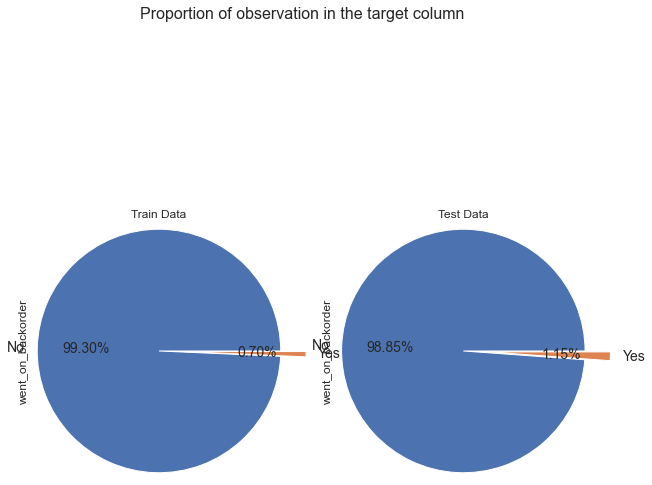

In [25]:
# Checking for the target varibale proportion

print('Train Data','\n',df_train['went_on_backorder'].value_counts(),'\n')
print('Test Data','\n',df_test['went_on_backorder'].value_counts(),'\n')
plt.figure(figsize=(10,10))
plt.suptitle('Proportion of observation in the target column',fontsize=16)
plt.subplot(1,2,1)
plt.title('Train Data')
df_train['went_on_backorder'].value_counts(normalize=True).plot(kind='pie',autopct='%.2f%%',
                                                               labels=df_train['went_on_backorder'].value_counts().index,
                                                                radius=1.2,explode=(0,0.25),textprops={'fontsize':14})
plt.subplot(1,2,2)
plt.title('Test Data')
df_test['went_on_backorder'].value_counts(normalize=True).plot(kind='pie',autopct='%.2f%%',
                                                              labels=df_train['went_on_backorder'].value_counts().index,
                                                               radius=1.2,explode=(0,0.25),textprops={'fontsize':14})
plt.show()

Since few of the columns do not have statistically equal mean for train and test, we cannot say that they represent eachother. Hence we join them to a single dataset.

From the data proportions of the target variable, we can see that there is a high imbalance in the dataset.

In [26]:
#checking % Yes & No in categorical columns
for i in df_train.select_dtypes(exclude=np.number).columns:
    print(df_train[i].value_counts(normalize=True)*100)
    print('-------------------------------')
    print('\n')

No     99.943531
Yes     0.056469
Name: potential_issue, dtype: float64
-------------------------------


No     79.850255
Yes    20.149745
Name: deck_risk, dtype: float64
-------------------------------


No     99.984279
Yes     0.015721
Name: oe_constraint, dtype: float64
-------------------------------


No     88.286184
Yes    11.713816
Name: ppap_risk, dtype: float64
-------------------------------


Yes    97.727386
No      2.272614
Name: stop_auto_buy, dtype: float64
-------------------------------


No     99.976322
Yes     0.023678
Name: rev_stop, dtype: float64
-------------------------------


No     99.302931
Yes     0.697069
Name: went_on_backorder, dtype: float64
-------------------------------




## Changing the target column classes to numerical

In [27]:
for i in df_train.select_dtypes(exclude=np.number).columns:
    df_train[i]=pd.get_dummies(df_train[[i]],drop_first=True)
    df_test[i]=pd.get_dummies(df_test[[i]],drop_first=True)

In [28]:
df_train.head()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
1,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.99,0.99,0.0,0,0,0,1,0,0
3,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,0.10,0.13,0.0,0,0,0,1,0,0
5,13.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.82,0.87,0.0,0,0,0,1,0,0
7,6.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.00,0.00,0.0,1,0,1,1,0,0
9,4.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.82,0.87,0.0,0,0,0,1,0,0


In [29]:
df_test.head()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
2,17.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.92,0.95,0.0,0,0,0,1,0,0
3,9.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0,0.0,0.78,0.75,0.0,0,0,1,1,0,0
4,2.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.54,0.71,0.0,0,0,0,1,0,0
5,15.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0,0.0,0.37,0.68,0.0,0,0,0,1,0,0
13,208.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.66,0.64,0.0,0,0,0,1,0,0


In [30]:
# between 90 to 100 percentile
for i in df_annova.select_dtypes(include=np.number).columns:
    print(i)
    print('\n')
    print(i,'Percent of samples have',i, 'values Less than 1% :',df_train[i].quantile(.01))
    print(i,'Percent of samples have',i, 'values Less than 10%',df_train[i].quantile(.1))
    print(i,'Percent of samples have',i, 'values Less than 50:',df_train[i].quantile(.5))
    print(i,'Percent of samples have',i, 'values Less than 99%:',df_train[i].quantile(.99))
    print('--------------------------------------------------------------------------------------')
    print('\n')

national_inv


national_inv Percent of samples have national_inv values Less than 1% : 0.0
national_inv Percent of samples have national_inv values Less than 10% 2.0
national_inv Percent of samples have national_inv values Less than 50: 14.0
national_inv Percent of samples have national_inv values Less than 99%: 5000.0
--------------------------------------------------------------------------------------


lead_time


lead_time Percent of samples have lead_time values Less than 1% : 2.0
lead_time Percent of samples have lead_time values Less than 10% 2.0
lead_time Percent of samples have lead_time values Less than 50: 8.0
lead_time Percent of samples have lead_time values Less than 99%: 52.0
--------------------------------------------------------------------------------------


in_transit_qty


in_transit_qty Percent of samples have in_transit_qty values Less than 1% : 0.0
in_transit_qty Percent of samples have in_transit_qty values Less than 10% 0.0
in_transit_qty Percent of samples 

In [31]:
df_annova.skew()

national_inv         412.505821
lead_time              4.638504
in_transit_qty       169.970572
forecast_3_month     133.728425
forecast_6_month     133.766339
forecast_9_month     138.022826
sales_1_month        207.303211
sales_3_month        141.146966
sales_6_month        141.579958
sales_9_month        135.781671
min_bank             108.541234
pieces_past_due      400.475348
perf_6_month_avg      -1.584979
perf_12_month_avg     -1.622314
local_bo_qty         168.245383
dtype: float64

In [32]:
from sklearn.preprocessing import PowerTransformer
PT=PowerTransformer()
for i in df_annova.select_dtypes(include=np.number).columns:
    df_train[i]=PT.fit_transform(df_train[[i]])
    df_test[i]=PT.fit_transform(df_test[[i]])

In [33]:
df_train.skew()

national_inv        -38.799178
lead_time             0.016813
in_transit_qty        1.464601
forecast_3_month      0.916827
forecast_6_month      0.707889
forecast_9_month      0.613549
sales_1_month         0.629818
sales_3_month         0.406645
sales_6_month         0.305193
sales_9_month         0.257035
min_bank              0.639569
potential_issue      42.046315
pieces_past_due       7.707567
perf_6_month_avg     -0.381446
perf_12_month_avg    -0.359236
local_bo_qty          8.155611
deck_risk             1.488352
oe_constraint        79.735533
ppap_risk             2.381096
stop_auto_buy        -6.405118
rev_stop             64.963573
went_on_backorder    11.851797
dtype: float64

In [34]:
df_test.skew()

national_inv        -38.719522
lead_time             0.019428
in_transit_qty        1.601724
forecast_3_month      0.934232
forecast_6_month      0.716331
forecast_9_month      0.620233
sales_1_month         0.656542
sales_3_month         0.415082
sales_6_month         0.305831
sales_9_month         0.256542
min_bank              0.633653
potential_issue      52.438562
pieces_past_due       8.474250
perf_6_month_avg     -0.384937
perf_12_month_avg    -0.363465
local_bo_qty          8.877429
deck_risk             1.777621
oe_constraint        68.856312
ppap_risk             2.415026
stop_auto_buy        -5.979793
rev_stop             64.839135
went_on_backorder     9.163848
dtype: float64

In [35]:
for i in df_annova.select_dtypes(include=np.number).columns:
    print(i)
    print('\n')
    print(i,'Percent of samples have',i, 'values Less than 1%  -',df_train[i].quantile(.01))
    print(i,'Percent of samples have',i, 'values Less than 10% -',df_train[i].quantile(.1))
    print(i,'Percent of samples have',i, 'values Less than 50% -',df_train[i].quantile(.5))
    print(i,'Percent of samples have',i, 'values Less than 99% -',df_train[i].quantile(.99))
    print('--------------------------------------------------------------------------------------')
    print('\n')

national_inv


national_inv Percent of samples have national_inv values Less than 1%  - -0.0907319627853006
national_inv Percent of samples have national_inv values Less than 10% - -0.08824716166955751
national_inv Percent of samples have national_inv values Less than 50% - -0.07766543347082469
national_inv Percent of samples have national_inv values Less than 99% - 1.1711639730435992
--------------------------------------------------------------------------------------


lead_time


lead_time Percent of samples have lead_time values Less than 1%  - -1.4664333023554077
lead_time Percent of samples have lead_time values Less than 10% - -1.4664333023554077
lead_time Percent of samples have lead_time values Less than 50% - 0.32868686297710215
lead_time Percent of samples have lead_time values Less than 99% - 3.5130225609329653
--------------------------------------------------------------------------------------


in_transit_qty


in_transit_qty Percent of samples have in_transit_qty valu

# Numerical features

### Feature : national_inv

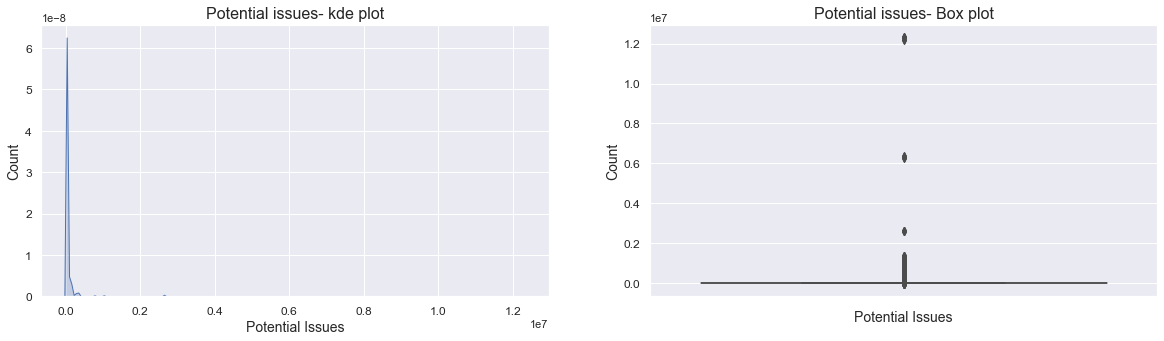

Skewness = 340.2858003326191
Kurtosis = 131276.59257932162


In [36]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.kdeplot(data=train_data, x="national_inv", fill=True)
plt.title('Potential issues- kde plot',fontsize=16)
plt.xlabel('Potential Issues',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.subplot(1,2,2)
sns.boxplot(y="national_inv", data=train_data)
plt.title('Potential issues- Box plot',fontsize=16)
plt.xlabel('Potential Issues',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

print('Skewness =',train_data['national_inv'].skew())
print('Kurtosis =',train_data['national_inv'].kurt())



IQR of the 'national_inv' is small as compared to the range of its values.

Feature heavily right skewd as it has high positive skewdness value.

Kurtosis value is very high impling that there are a lot of values located in the tail part of the distribution.



### Feature : lead_time

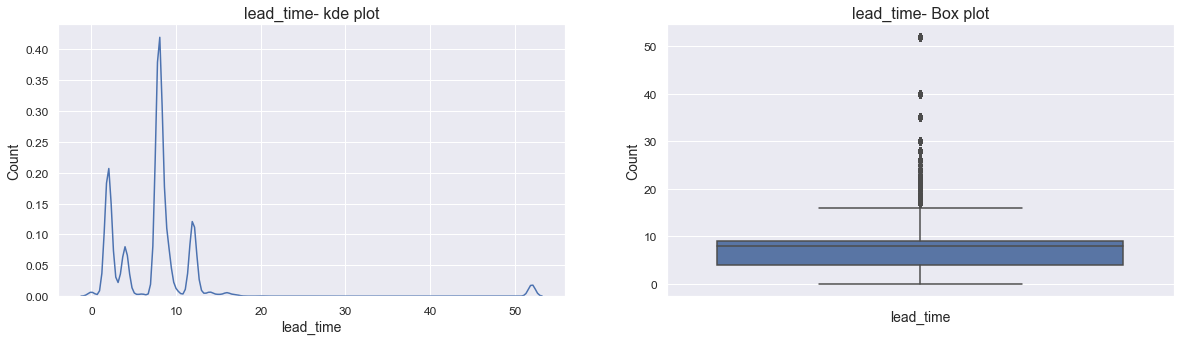

Skewness = 4.556295427885091
Kurtosis = 26.23722750420738


In [37]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.kdeplot(data=train_data, x="lead_time")
plt.title('lead_time- kde plot',fontsize=16)
plt.xlabel('lead_time',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.subplot(1,2,2)
sns.boxplot(y="lead_time", data=train_data)
plt.title('lead_time- Box plot',fontsize=16)
plt.xlabel('lead_time',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

print('Skewness =',train_data['lead_time'].skew())
print('Kurtosis =',train_data['lead_time'].kurt())



IQR of the 'lead_time' is medium as compared to the range of its values.

Feature heavily right skewd as it has high positive skewdness value.

Kurtosis value is very high impling that there are a lot of values located in the tail part of the distribution.



### Feature : in_transit_qty

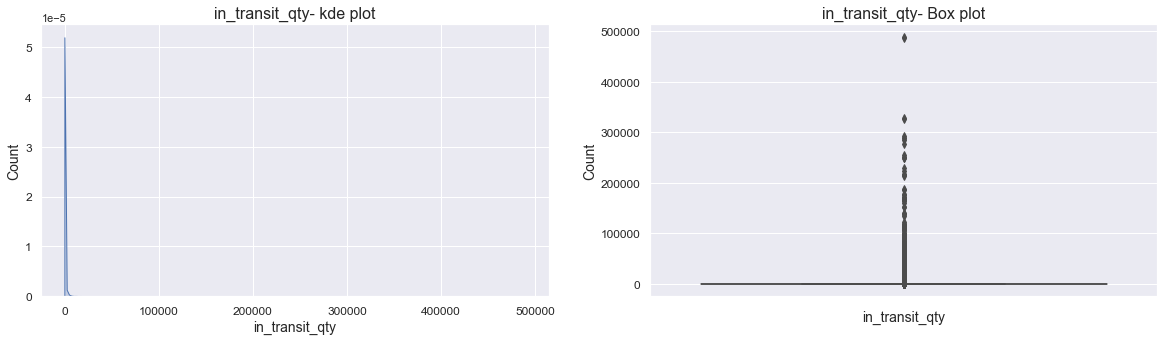

Skewness = 166.18340424761558
Kurtosis = 39606.10405290813


In [38]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.kdeplot(data=train_data, x="in_transit_qty", fill=True)
plt.title('in_transit_qty- kde plot',fontsize=16)
plt.xlabel('in_transit_qty',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.subplot(1,2,2)
sns.boxplot(y="in_transit_qty", data=train_data)
plt.title('in_transit_qty- Box plot',fontsize=16)
plt.xlabel('in_transit_qty',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

print('Skewness =',train_data['in_transit_qty'].skew())
print('Kurtosis =',train_data['in_transit_qty'].kurt())



IQR of the 'in_transit_qty' is medium as compared to the range of its values.

Feature heavily right skewd as it has high positive skewdness value.

Kurtosis value is very high impling that there are a lot of values located in the tail part of the distribution.



### Feature : forecast_3_month

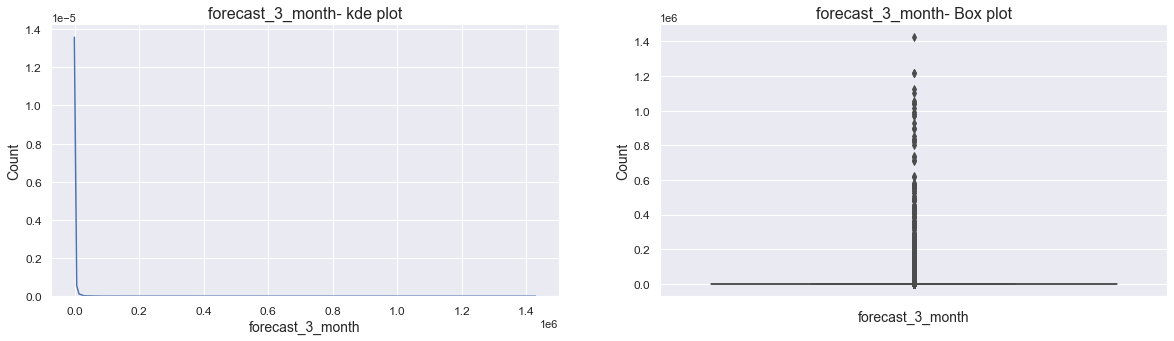

Skewness = 138.96832519579834
Kurtosis = 25637.55029993227


In [39]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.kdeplot(data=train_data, x="forecast_3_month")
plt.title('forecast_3_month- kde plot',fontsize=16)
plt.xlabel('forecast_3_month',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.subplot(1,2,2)
sns.boxplot(y="forecast_3_month", data=train_data)
plt.title('forecast_3_month- Box plot',fontsize=16)
plt.xlabel('forecast_3_month',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

print('Skewness =',train_data['forecast_3_month'].skew())
print('Kurtosis =',train_data['forecast_3_month'].kurt())



IQR of the 'forecast_3_month' is small as compared to the range of its values.

Feature heavily right skewed as it has high positive skewdness value.

Kurtosis value is very high impling that there are a lot of values located in the tail part of the distribution.



### Feature : forecast_6_month

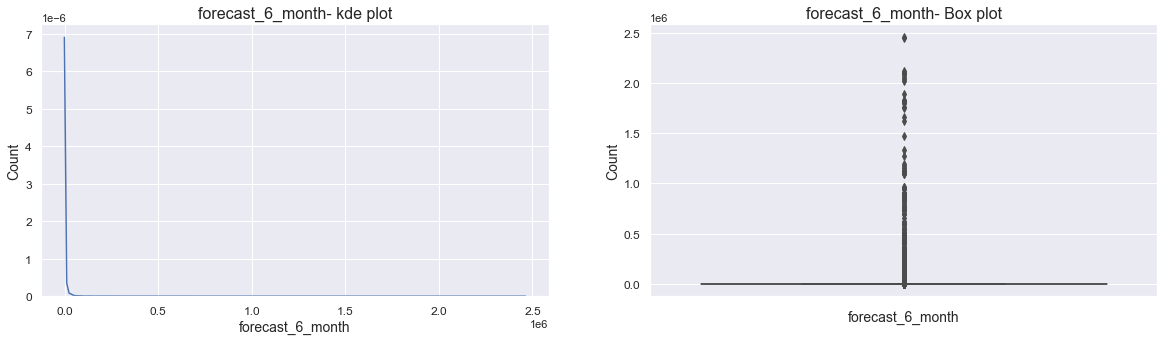

Skewness = 138.96142721254265
Kurtosis = 25189.903788272073


In [40]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.kdeplot(data=train_data, x="forecast_6_month")
plt.title('forecast_6_month- kde plot',fontsize=16)
plt.xlabel('forecast_6_month',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.subplot(1,2,2)
sns.boxplot(y="forecast_6_month", data=train_data)
plt.title('forecast_6_month- Box plot',fontsize=16)
plt.xlabel('forecast_6_month',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

print('Skewness =',train_data['forecast_6_month'].skew())
print('Kurtosis =',train_data['forecast_6_month'].kurt())



IQR of the 'forecast_6_month' is small as compared to the range of its values.

Feature heavily right skewed as it has high positive skewdness value.

Kurtosis value is very high impling that there are a lot of values located in the tail part of the distribution.



### Feature : forecast_9_month

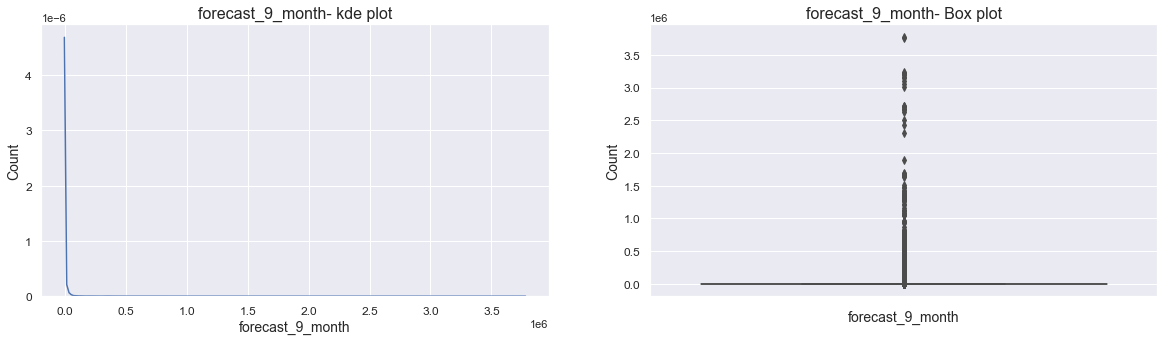

Skewness = 143.298874740098
Kurtosis = 27048.452312581445


In [41]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.kdeplot(data=train_data, x="forecast_9_month")
plt.title('forecast_9_month- kde plot',fontsize=16)
plt.xlabel('forecast_9_month',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.subplot(1,2,2)
sns.boxplot(y="forecast_9_month", data=train_data)
plt.title('forecast_9_month- Box plot',fontsize=16)
plt.xlabel('forecast_9_month',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

print('Skewness =',train_data['forecast_9_month'].skew())
print('Kurtosis =',train_data['forecast_9_month'].kurt())



IQR of the 'forecast_9_month' is small as compared to the range of its values.

Feature heavily right skewed as it has high positive skewdness value.

Kurtosis value is very high impling that there are a lot of values located in the tail part of the distribution.



### Feature : sales_1_month

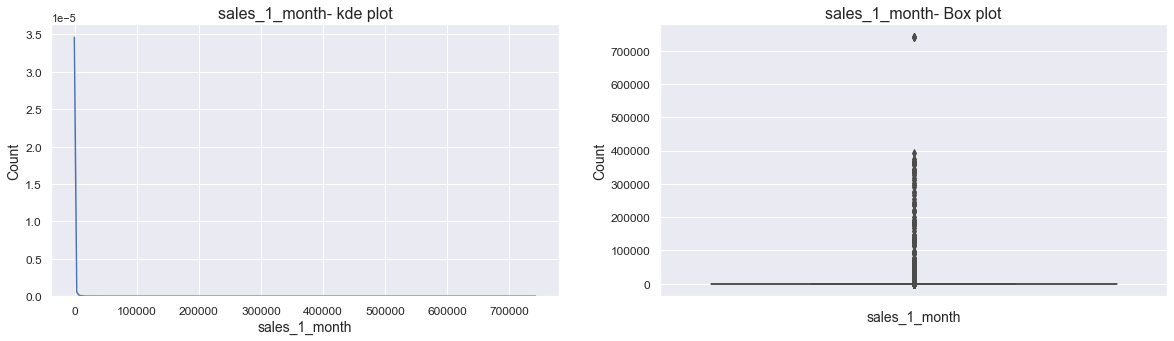

Skewness = 196.1199898556541
Kurtosis = 53855.92556025887


In [42]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.kdeplot(data=train_data, x="sales_1_month")
plt.title('sales_1_month- kde plot',fontsize=16)
plt.xlabel('sales_1_month',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.subplot(1,2,2)
sns.boxplot(y="sales_1_month", data=train_data)
plt.title('sales_1_month- Box plot',fontsize=16)
plt.xlabel('sales_1_month',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

print('Skewness =',train_data['sales_1_month'].skew())
print('Kurtosis =',train_data['sales_1_month'].kurt())



IQR of the 'sales_1_month' is medium as compared to the range of its values.

Feature heavily right skewd as it has high positive skewdness value.

Kurtosis value is very high impling that there are a lot of values located in the tail part of the distribution.



### Feature : sales_3_month

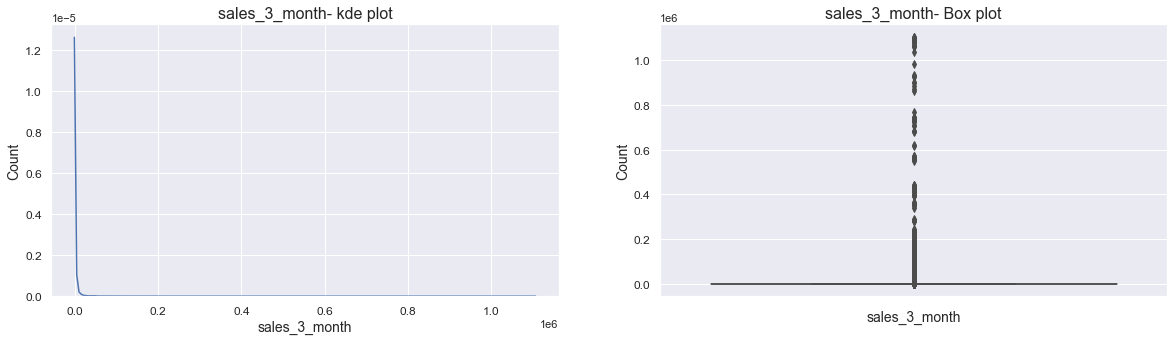

Skewness = 141.2863795444832
Kurtosis = 24198.860650933373


In [43]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.kdeplot(data=train_data, x="sales_3_month")
plt.title('sales_3_month- kde plot',fontsize=16)
plt.xlabel('sales_3_month',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.subplot(1,2,2)
sns.boxplot(y="sales_3_month", data=train_data)
plt.title('sales_3_month- Box plot',fontsize=16)
plt.xlabel('sales_3_month',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

print('Skewness =',train_data['sales_3_month'].skew())
print('Kurtosis =',train_data['sales_3_month'].kurt())



IQR of the 'sales_3_month' is very small as compared to the range of its values.

Feature heavily right skewd as it has high positive skewdness value.

Kurtosis value is very high impling that there are a lot of values located in the tail part of the distribution.



### Feature : sales_6_month

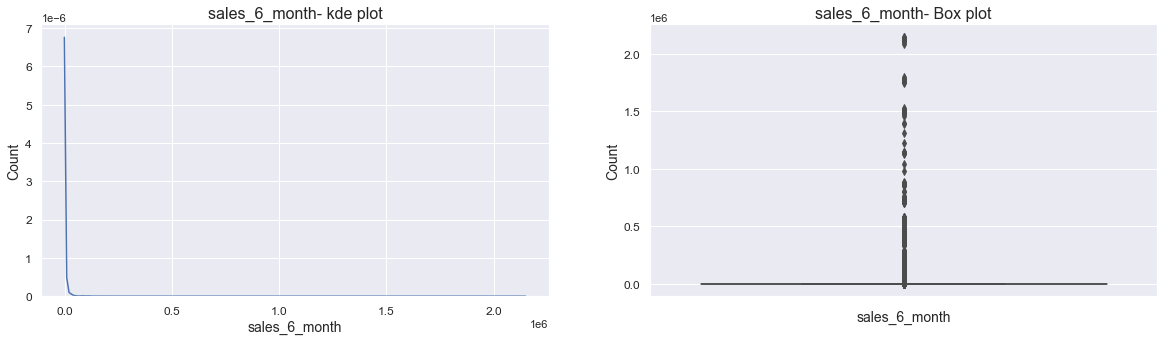

Skewness = 139.17671201086372
Kurtosis = 24305.44501338931


In [44]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.kdeplot(data=train_data, x="sales_6_month")
plt.title('sales_6_month- kde plot',fontsize=16)
plt.xlabel('sales_6_month',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.subplot(1,2,2)
sns.boxplot(y="sales_6_month", data=train_data)
plt.title('sales_6_month- Box plot',fontsize=16)
plt.xlabel('sales_6_month',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

print('Skewness =',train_data['sales_6_month'].skew())
print('Kurtosis =',train_data['sales_6_month'].kurt())



IQR of the 'sales_6_month' is very small as compared to the range of its values.

Feature heavily right skewd as it has high positive skewdness value.

Kurtosis value is very high impling that there are a lot of values located in the tail part of the distribution.



### Feature : sales_9_month

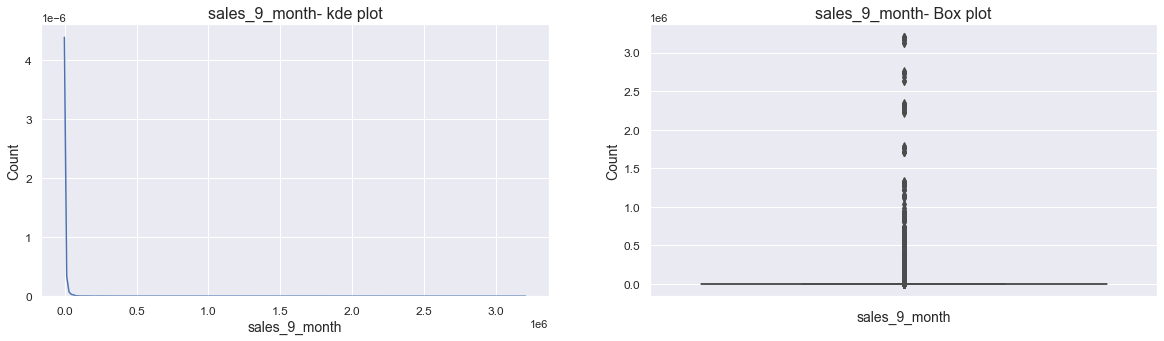

Skewness = 135.05419147168155
Kurtosis = 22844.80574661239


In [45]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.kdeplot(data=train_data, x="sales_9_month")
plt.title('sales_9_month- kde plot',fontsize=16)
plt.xlabel('sales_9_month',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.subplot(1,2,2)
sns.boxplot(y="sales_9_month", data=train_data)
plt.title('sales_9_month- Box plot',fontsize=16)
plt.xlabel('sales_9_month',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

print('Skewness =',train_data['sales_9_month'].skew())
print('Kurtosis =',train_data['sales_9_month'].kurt())



IQR of the 'sales_9_month' is very small as compared to the range of its values.

Feature heavily right skewd as it has high positive skewdness value.

Kurtosis value is very high impling that there are a lot of values located in the tail part of the distribution.



### Feature : min_bank

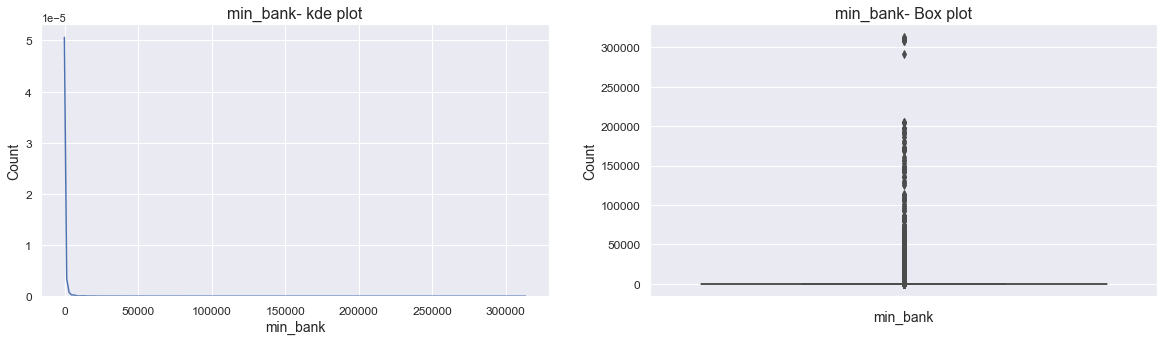

Skewness = 131.21264893012795
Kurtosis = 23549.240091008585


In [46]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.kdeplot(data=train_data, x="min_bank")
plt.title('min_bank- kde plot',fontsize=16)
plt.xlabel('min_bank',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.subplot(1,2,2)
sns.boxplot(y="min_bank", data=train_data)
plt.title('min_bank- Box plot',fontsize=16)
plt.xlabel('min_bank',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

print('Skewness =',train_data['min_bank'].skew())
print('Kurtosis =',train_data['min_bank'].kurt())



IQR of the 'min_bank' is very small as compared to the range of its values.

Feature heavily right skewd as it has high positive skewdness value.

Kurtosis value is very high impling that there are a lot of values located in the tail part of the distribution.



### Feature : pieces_past_due

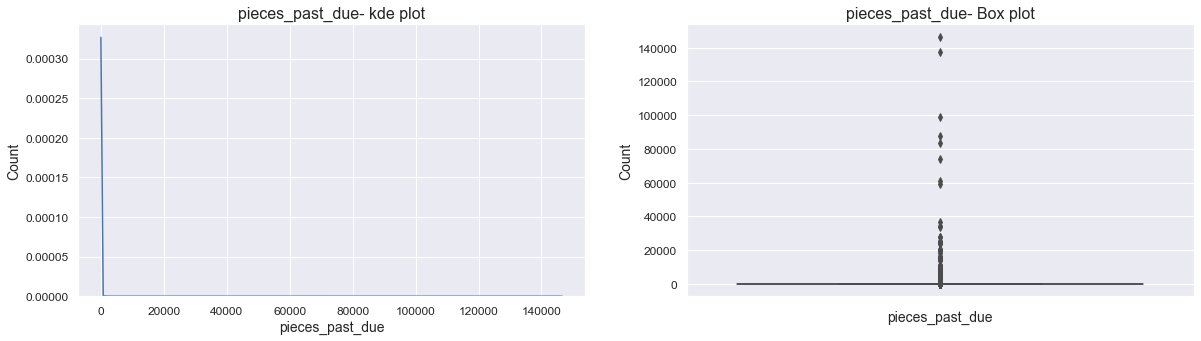

Skewness = 412.39190039252696
Kurtosis = 207663.2258415861


In [47]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.kdeplot(data=train_data, x="pieces_past_due")
plt.title('pieces_past_due- kde plot',fontsize=16)
plt.xlabel('pieces_past_due',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.subplot(1,2,2)
sns.boxplot(y="pieces_past_due", data=train_data)
plt.title('pieces_past_due- Box plot',fontsize=16)
plt.xlabel('pieces_past_due',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

print('Skewness =',train_data['pieces_past_due'].skew())
print('Kurtosis =',train_data['pieces_past_due'].kurt())



IQR of the 'pieces_past_due' is very small as compared to the range of its values.

Feature heavily right skewd as it has high positive skewdness value.

Kurtosis value is very high impling that there are a lot of values located in the tail part of the distribution.



### Feature : perf_6_month_avg

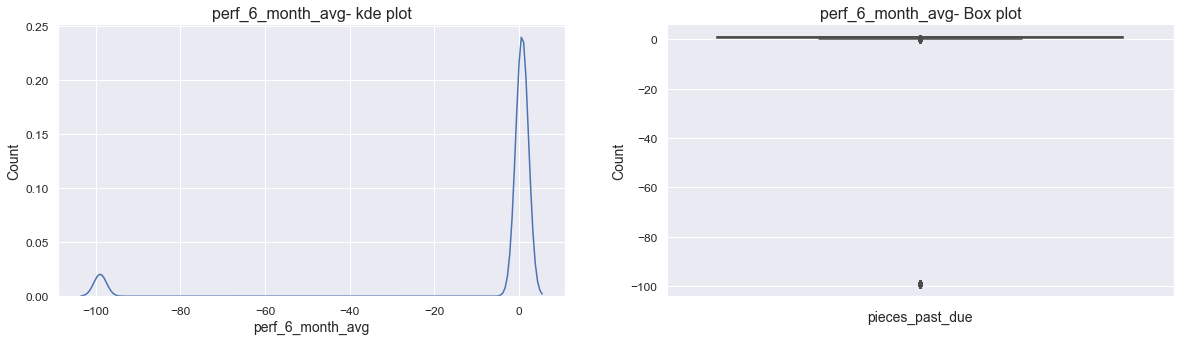

Skewness = -3.180621807495058
Kurtosis = 8.11739511529576


In [48]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.kdeplot(data=train_data, x="perf_6_month_avg")
plt.title('perf_6_month_avg- kde plot',fontsize=16)
plt.xlabel('perf_6_month_avg',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.subplot(1,2,2)
sns.boxplot(y="perf_6_month_avg", data=train_data)
plt.title('perf_6_month_avg- Box plot',fontsize=16)
plt.xlabel('pieces_past_due',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

print('Skewness =',train_data['perf_6_month_avg'].skew())
print('Kurtosis =',train_data['perf_6_month_avg'].kurt())



IQR of the 'perf_6_month_avg' is large as compared to the range of its values.

Feature left skewd as it has low negative skewdness value.

Kurtosis value is low impling that there are a some values located in the tail part of the distribution.

### Feature : perf_12_month_avg

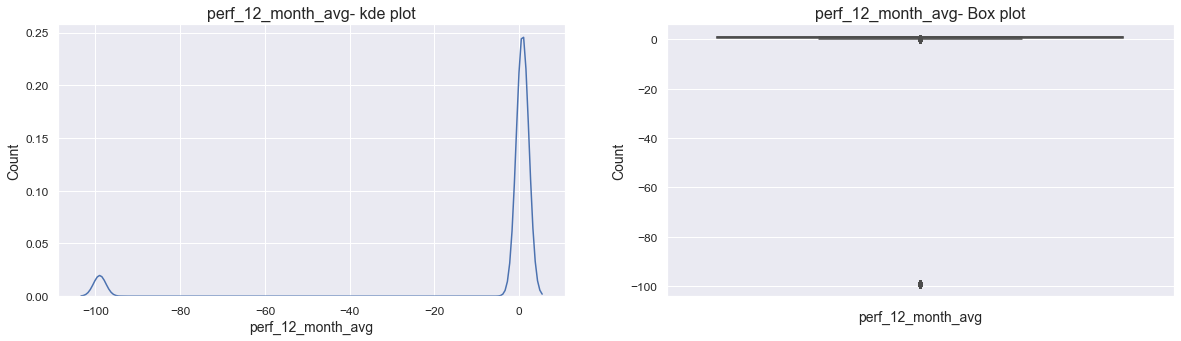

Skewness = -3.3021812484797537
Kurtosis = 8.905503219179664


In [49]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.kdeplot(data=train_data, x="perf_12_month_avg")
plt.title('perf_12_month_avg- kde plot',fontsize=16)
plt.xlabel('perf_12_month_avg',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.subplot(1,2,2)
sns.boxplot(y="perf_12_month_avg", data=train_data)
plt.title('perf_12_month_avg- Box plot',fontsize=16)
plt.xlabel('perf_12_month_avg',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

print('Skewness =',train_data['perf_12_month_avg'].skew())
print('Kurtosis =',train_data['perf_12_month_avg'].kurt())



IQR of the 'perf_12_month_avg' is large as compared to the range of its values.

Feature left skewd as it has low negative skewdness value.

Kurtosis value is low impling that there are a some values located in the tail part of the distribution.

### Feature : local_bo_qty

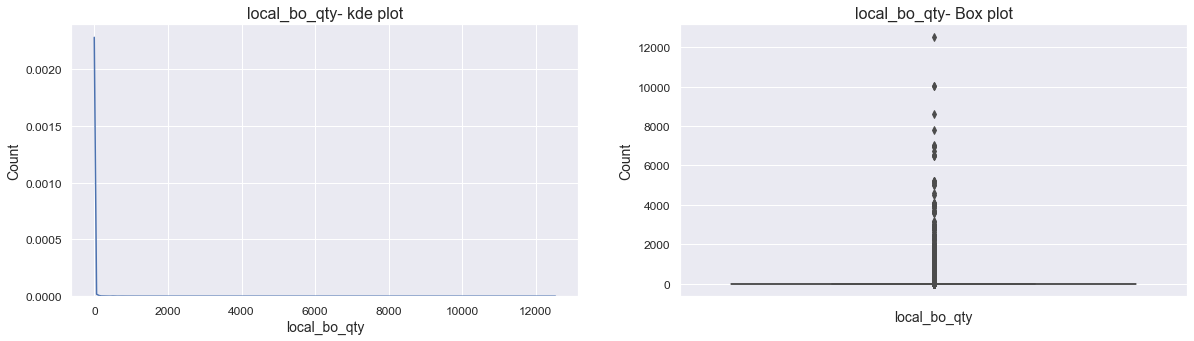

Skewness = 165.19054793748316
Kurtosis = 38154.955457397235


In [50]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.kdeplot(data=train_data, x="local_bo_qty")
plt.title('local_bo_qty- kde plot',fontsize=16)
plt.xlabel('local_bo_qty',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.subplot(1,2,2)
sns.boxplot(y="local_bo_qty", data=train_data)
plt.title('local_bo_qty- Box plot',fontsize=16)
plt.xlabel('local_bo_qty',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

print('Skewness =',train_data['local_bo_qty'].skew())
print('Kurtosis =',train_data['local_bo_qty'].kurt())

IQR of the 'local_bo_qty' is very small as compared to the range of its values.

Feature heavily right skewd as it has high positive skewdness value.

Kurtosis value is very high impling that there are a lot of values located in the tail part of the distribution.



## Bi Variate Analysis - Numerical:

### 'national_inv' vs 'went_on_backorder'

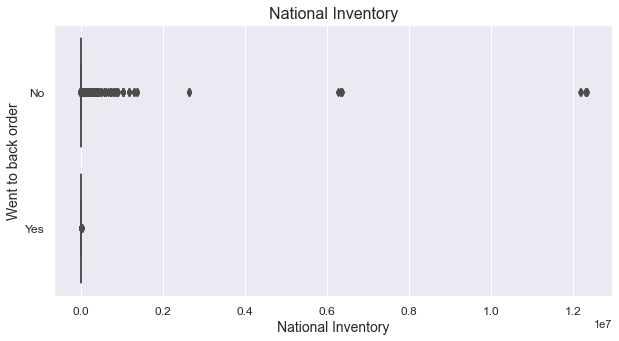

In [51]:
plt.figure(figsize=(10,5))
sns.boxplot(x='national_inv',y='went_on_backorder',data=train_data)
plt.title('National Inventory',fontsize=16)
plt.xlabel('National Inventory',fontsize=14)
plt.ylabel('Went to back order',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

When we split the plots based on the target variable, we can see that the extent of outliers are more for the No category as compared to Yes.

We can see that the data for the yes category has the highest points near 0.

Here we can see that when the product goes to back order, the national inventory is 0. That is there is high chance for the product to go to back order when the national inventory is 0.


### 'lead_time' vs 'went_on_backorder'

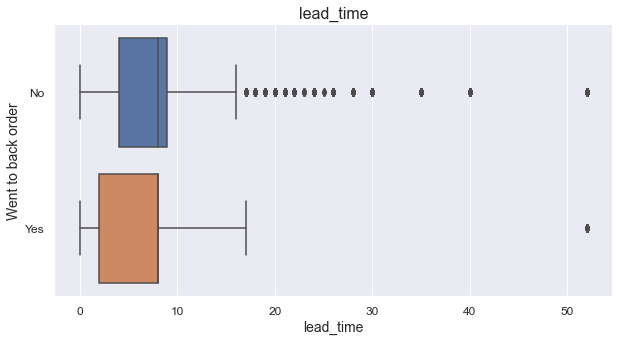

In [52]:
plt.figure(figsize=(10,5))
sns.boxplot(x='lead_time',y='went_on_backorder',data=train_data)
plt.title('lead_time',fontsize=16)
plt.xlabel('lead_time',fontsize=14)
plt.ylabel('Went to back order',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

The data split based on target variable show a similar dispersion pattern. 

For both the classes, IQR is overlapping.Median values are overlaping , Hence, this feature doesn't seem helpful for classification.

Both the data have outliers with similar values.




### 'in_transit_qty' vs 'went_on_backorder'

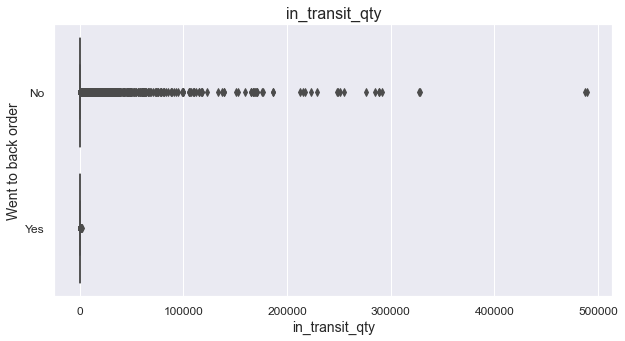

In [53]:
plt.figure(figsize=(10,5))
sns.boxplot(x='in_transit_qty',y='went_on_backorder',data=train_data)
plt.title('in_transit_qty',fontsize=16)
plt.xlabel('in_transit_qty',fontsize=14)
plt.ylabel('Went to back order',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

The in transit quantity  for went to  back order is most focused at zero. this is because,
the feature in transit quantity sincerely refers to the products which can be already available, if it is available then probabilities of the product going to returned order could be very less. 

The few factors which might be shown with value other than 0 perhaps indicating that the product may have got stuck in a few a part of the shipping, and that has caused the product to go to back order status



### 'forecast_3_month' vs 'went_on_backorder'

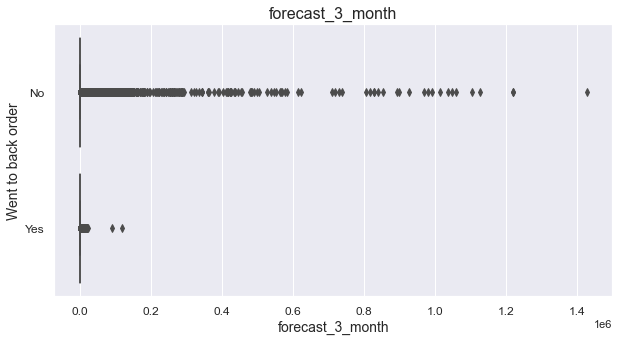

In [54]:
plt.figure(figsize=(10,5))
sns.boxplot(x='forecast_3_month',y='went_on_backorder',data=train_data)
plt.title('forecast_3_month',fontsize=16)
plt.xlabel('forecast_3_month',fontsize=14)
plt.ylabel('Went to back order',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()



When split based on the target variable, the no category has large value of outliers present as compared to the yes category.

### 'forecast_6_month' vs 'went_on_backorder'

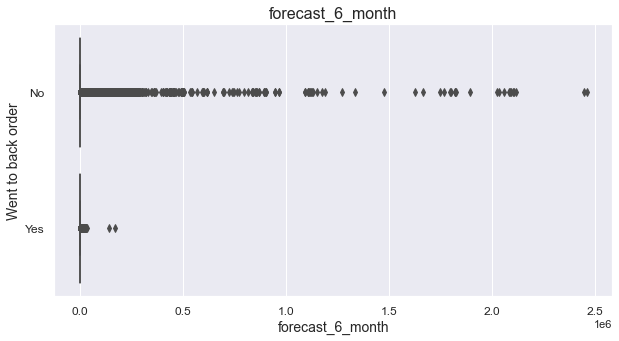

In [55]:
plt.figure(figsize=(10,5))
sns.boxplot(x='forecast_6_month',y='went_on_backorder',data=train_data)
plt.title('forecast_6_month',fontsize=16)
plt.xlabel('forecast_6_month',fontsize=14)
plt.ylabel('Went to back order',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


When split based on the target variable, the no category has large value of outliers present as compared to the yes category.

### 'forecast_9_month' vs 'went_on_backorder'

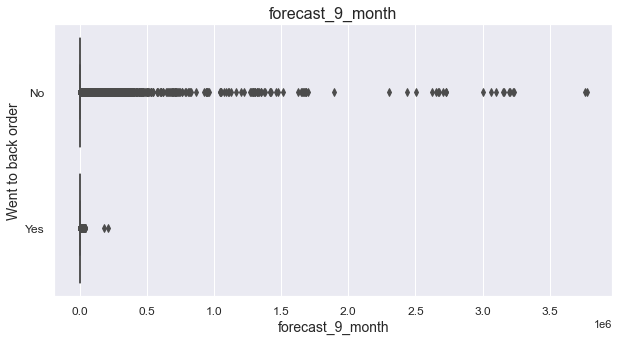

In [56]:
plt.figure(figsize=(10,5))
sns.boxplot(x='forecast_9_month',y='went_on_backorder',data=train_data)
plt.title('forecast_9_month',fontsize=16)
plt.xlabel('forecast_9_month',fontsize=14)
plt.ylabel('Went to back order',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()



When split based on the target variable, the no category has large value of outliers present as compared to the yes category.

### 'sales_1_month' vs 'went_on_backorder'

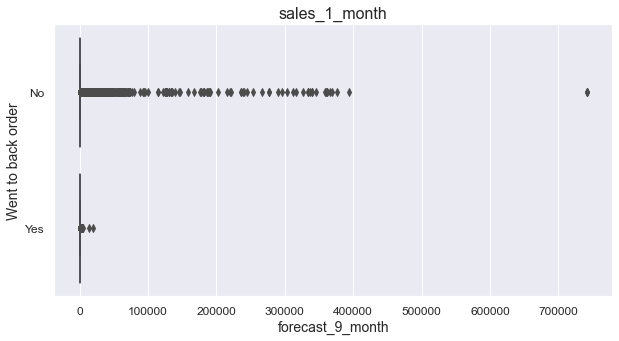

In [57]:
plt.figure(figsize=(10,5))
sns.boxplot(x='sales_1_month',y='went_on_backorder',data=train_data)
plt.title('sales_1_month',fontsize=16)
plt.xlabel('forecast_9_month',fontsize=14)
plt.ylabel('Went to back order',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

On the target variable split ,We can clearly see the large number of observation near zero for both the categories

The yes category has less outlier  and where as the  no category outliers are widely spread .

The Yes category has more number of records at 0 value as compared to No category.


### 'sales_3_month' vs 'went_on_backorder'

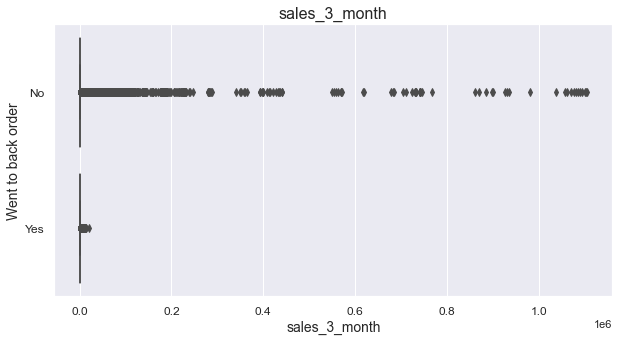

In [58]:
plt.figure(figsize=(10,5))
sns.boxplot(x='sales_3_month',y='went_on_backorder',data=train_data)
plt.title('sales_3_month',fontsize=16)
plt.xlabel('sales_3_month',fontsize=14)
plt.ylabel('Went to back order',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()



On the target variable split ,We can clearly see the large number of observation near zero for both the categories

The yes category has less outlier  and where as the  no category outliers are widely spread .

The Yes category has more number of records at 0 value as compared to No category.



### 'sales_6_month' vs 'went_on_backorder'

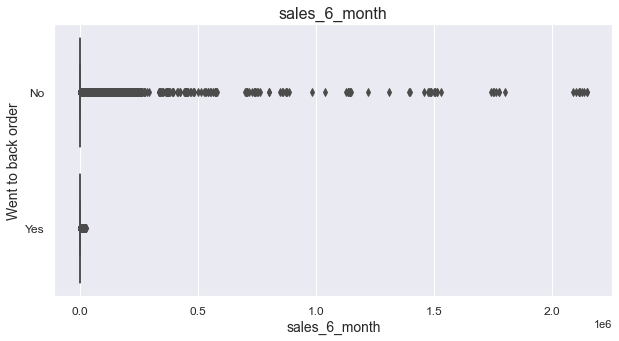

In [59]:
plt.figure(figsize=(10,5))
sns.boxplot(x='sales_6_month',y='went_on_backorder',data=train_data)
plt.title('sales_6_month',fontsize=16)
plt.xlabel('sales_6_month',fontsize=14)
plt.ylabel('Went to back order',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()




On the target variable split ,We can clearly see the large number of observation near zero for both the categories

The yes category has less outlier  and where as the  no category outliers are widely spread .

The Yes category has more number of records at 0 value as compared to No category.


### 'sales_9_month' vs 'went_on_backorder'

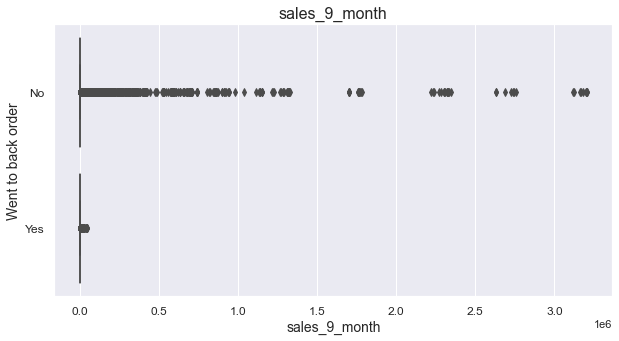

In [60]:
plt.figure(figsize=(10,5))
sns.boxplot(x='sales_9_month',y='went_on_backorder',data=train_data)
plt.title('sales_9_month',fontsize=16)
plt.xlabel('sales_9_month',fontsize=14)
plt.ylabel('Went to back order',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()




On the target variable split ,We can clearly see the large number of observation near zero for both the categories

The yes category has less outlier  and where as the  no category outliers are widely spread .

The Yes category has more number of records at 0 value as compared to No category.


### 'min_bank' vs 'went_on_backorder'

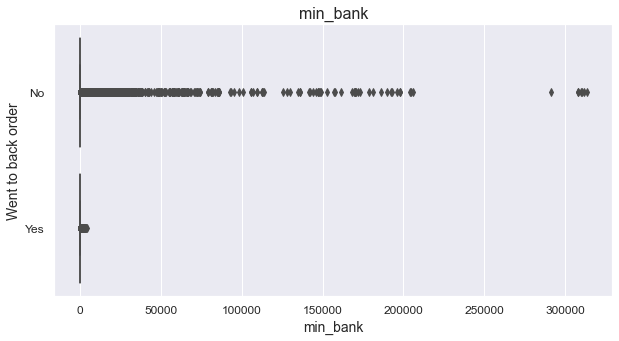

In [61]:
plt.figure(figsize=(10,5))
sns.boxplot(x='min_bank',y='went_on_backorder',data=train_data)
plt.title('min_bank',fontsize=16)
plt.xlabel('min_bank',fontsize=14)
plt.ylabel('Went to back order',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

On the target variable split ,We can clearly see the large number of observation near zero for both the categories

The yes category has less outlier and where as the no category outliers are widely spread .

The Yes category has more number of records at 0 value as compared to No category.

We are able to see that the goods that went to  back orders had maximum of the observations with zero as  minimal recommended  stock. which means that if the recommended stock changed into better then the product won't have long gone into again order.



### 'pieces_past_due' vs 'went_on_backorder'

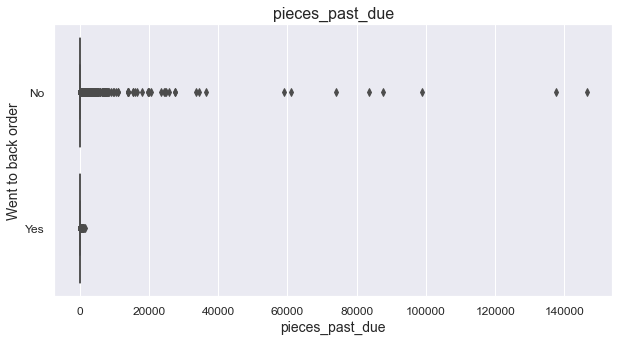

In [62]:
plt.figure(figsize=(10,5))
sns.boxplot(x='pieces_past_due',y='went_on_backorder',data=train_data)
plt.title('pieces_past_due',fontsize=16)
plt.xlabel('pieces_past_due',fontsize=14)
plt.ylabel('Went to back order',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

On the target variable split ,We can clearly see the large number of observation near zero for both the categories

The yes category has less outlier and where as the no category outliers are widely spread .

The Yes category has more number of records at 0 value as compared to No category.

### 'perf_6_month_avg' vs 'went_on_backorder'

In [63]:
train_data['perf_6_month_avg'] = train_data['perf_6_month_avg'].replace(-99,np.nan)
train_data['perf_12_month_avg'] = train_data['perf_12_month_avg'].replace(-99,np.nan)

In [64]:
train_data.dropna(inplace=True)

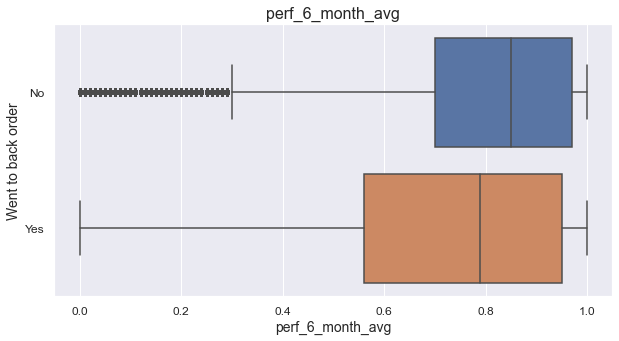

In [65]:
plt.figure(figsize=(10,5))
sns.boxplot(x='perf_6_month_avg',y='went_on_backorder',data=train_data)
plt.title('perf_6_month_avg',fontsize=16)
plt.xlabel('perf_6_month_avg',fontsize=14)
plt.ylabel('Went to back order',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

We can see that No category has all the outliers and yes category has no outliers at all

### 'perf_12_month_avg' vs 'went_on_backorder'

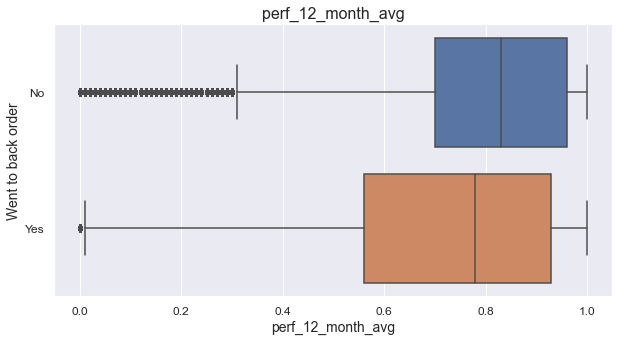

In [66]:
plt.figure(figsize=(10,5))
sns.boxplot(x='perf_12_month_avg',y='went_on_backorder',data=train_data)
plt.title('perf_12_month_avg',fontsize=16)
plt.xlabel('perf_12_month_avg',fontsize=14)
plt.ylabel('Went to back order',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

We can see that No category has all the outliers and yes category has no outliers at all

### 'local_bo_qty' vs 'went_on_backorder'

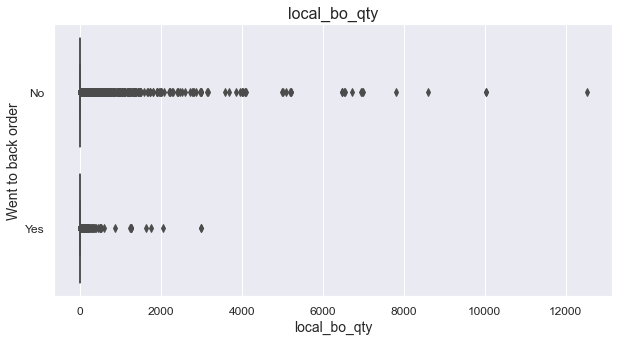

In [67]:
plt.figure(figsize=(10,5))
sns.boxplot(x='local_bo_qty',y='went_on_backorder',data=train_data)
plt.title('local_bo_qty',fontsize=16)
plt.xlabel('local_bo_qty',fontsize=14)
plt.ylabel('Went to back order',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()



There are outliers present in both the classes. The outliers for the No class of the target variable are more dispersed.

We can observe that in both the categories most records are located near 0.

## Caterogorical features:
    

### Feature : potential_issue

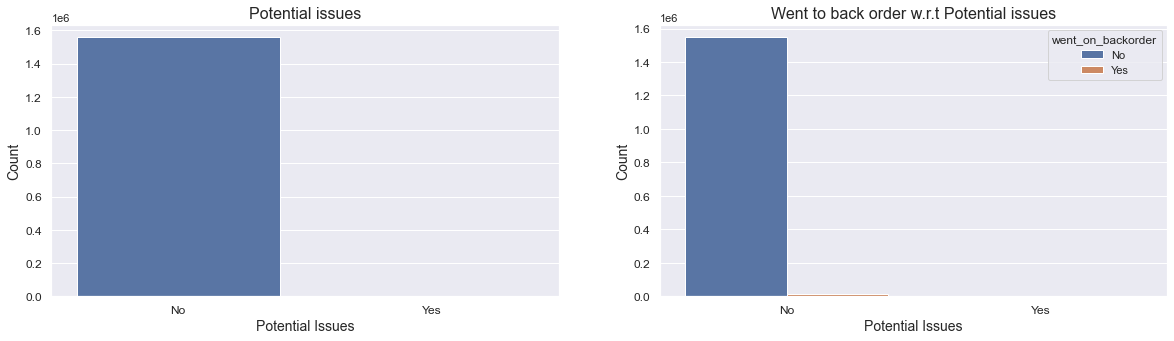

went_on_backorder,No,Yes
potential_issue,,
No,99.3,0.7
Yes,94.2,5.8


In [68]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.countplot(x='potential_issue',data=train_data)
plt.title('Potential issues',fontsize=16)
plt.xlabel('Potential Issues',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.subplot(1,2,2)
sns.countplot(x='potential_issue',hue='went_on_backorder',data=train_data)
plt.title('Went to back order w.r.t Potential issues',fontsize=16)
plt.xlabel('Potential Issues',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

pd.crosstab(train_data['potential_issue'],train_data['went_on_backorder']).apply(lambda x:round(( x/x.sum())*100,1), axis=1)

When 'potential_issue' is 'No', 0.7% products went to backorder.

When 'potential_issue' is 'Yes', 5.6% products went to backorder.

When 'potential_issue' is 'Yes', there 8 times more probability of product going to backorder.

### Feature : deck_risk

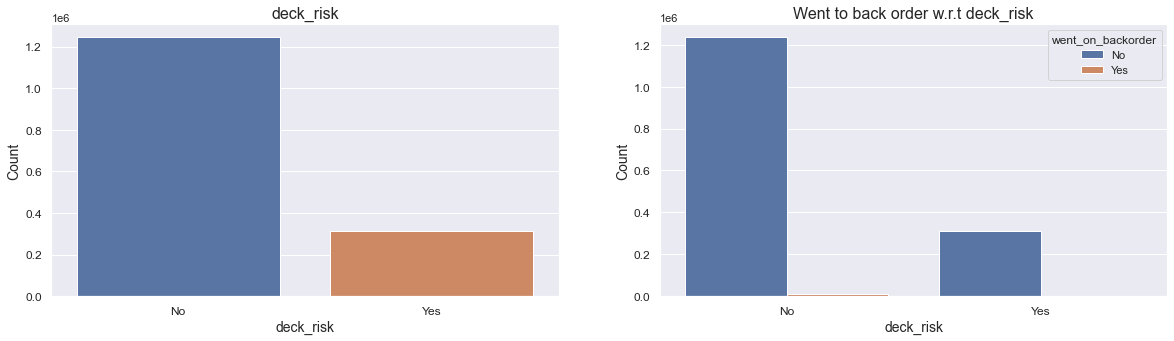

went_on_backorder,No,Yes
deck_risk,,
No,99.3,0.7
Yes,99.4,0.6


In [69]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.countplot(x='deck_risk',data=train_data)
plt.title('deck_risk',fontsize=16)
plt.xlabel('deck_risk',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.subplot(1,2,2)
sns.countplot(x='deck_risk',hue='went_on_backorder',data=train_data)
plt.title('Went to back order w.r.t deck_risk',fontsize=16)
plt.xlabel('deck_risk',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

pd.crosstab(train_data['deck_risk'],train_data['went_on_backorder']).apply(lambda x:round(( x/x.sum())*100,1), axis=1)

When 'deck_risk' is 'No', 0.7% products went to backorder.

When 'deck_risk' is 'Yes', 0.5% products went to backorder.

Since distribution of points, when product went to backorder is almost similar in this case, this feature doesn't seem helpful in determining whether or not product went ot backorder.

### Feature : oe_constraint

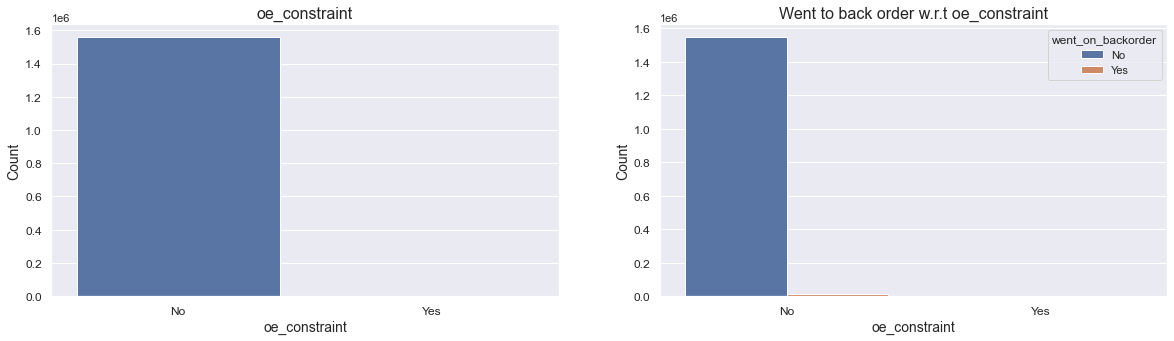

went_on_backorder,No,Yes
oe_constraint,,
No,99.3,0.7
Yes,96.7,3.3


In [70]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.countplot(x='oe_constraint',data=train_data)
plt.title('oe_constraint',fontsize=16)
plt.xlabel('oe_constraint',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.subplot(1,2,2)
sns.countplot(x='oe_constraint',hue='went_on_backorder',data=train_data)
plt.title('Went to back order w.r.t oe_constraint',fontsize=16)
plt.xlabel('oe_constraint',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

pd.crosstab(train_data['oe_constraint'],train_data['went_on_backorder']).apply(lambda x:round(( x/x.sum())*100,1), axis=1)

When 'oe_constraint' is 'No', 0.7% products went to backorder.

When 'oe_constraint' is 'Yes', 3.3% products went to backorder.

So, it means it 'oe_constraint' value is 'Yes' there are approx 5% more probability of product going to backorder. Hence, this feature is important.

### Feature : ppap_risk

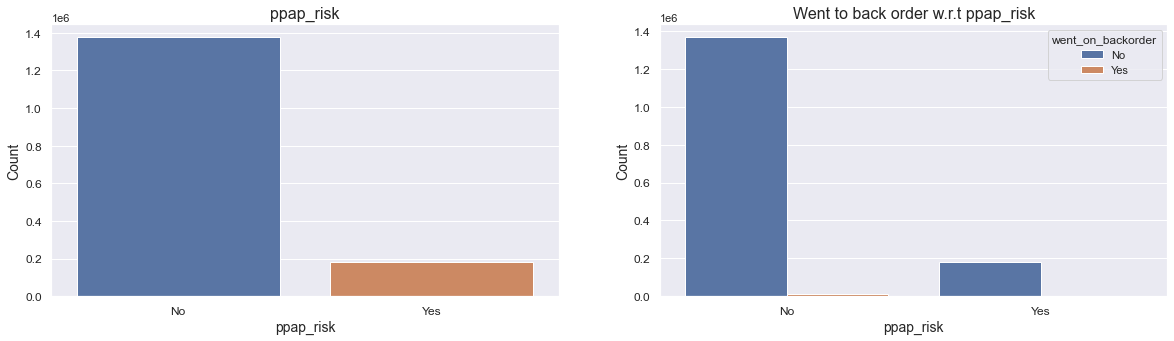

went_on_backorder,No,Yes
ppap_risk,,
No,99.3,0.7
Yes,99.1,0.9


In [71]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.countplot(x='ppap_risk',data=train_data)
plt.title('ppap_risk',fontsize=16)
plt.xlabel('ppap_risk',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.subplot(1,2,2)
sns.countplot(x='ppap_risk',hue='went_on_backorder',data=train_data)
plt.title('Went to back order w.r.t ppap_risk',fontsize=16)
plt.xlabel('ppap_risk',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

pd.crosstab(train_data['ppap_risk'],train_data['went_on_backorder']).apply(lambda x:round(( x/x.sum())*100,1), axis=1)

When 'ppap_risk' is 'No', 0.6% of product goes to backorder.

When 'ppap_risk' is 'Yes', 0.9% of product goes to backorder.

This feature also doesn't seem to be helpful as it is not providing much distinction between product went to backorder or not.

### Feature : stop_auto_buy

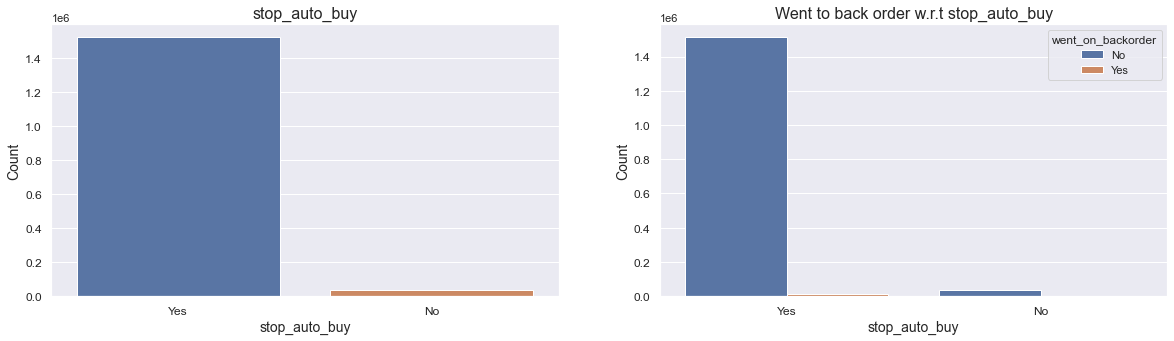

went_on_backorder,No,Yes
stop_auto_buy,,
No,99.1,0.9
Yes,99.3,0.7


In [72]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.countplot(x='stop_auto_buy',data=train_data)
plt.title('stop_auto_buy',fontsize=16)
plt.xlabel('stop_auto_buy',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.subplot(1,2,2)
sns.countplot(x='stop_auto_buy',hue='went_on_backorder',data=train_data)
plt.title('Went to back order w.r.t stop_auto_buy',fontsize=16)
plt.xlabel('stop_auto_buy',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

pd.crosstab(train_data['stop_auto_buy'],train_data['went_on_backorder']).apply(lambda x:round(( x/x.sum())*100,1), axis=1)

When 'stop_auto_buy' was 'Yes', about 0.7% of the products went to backorder.

When 'stop_auto_buy' was 'No', about 0.8% of the products went to backorder.

This feature is not helping much in classification, as it have almost equal distribution of points.

### Feature : rev_stop

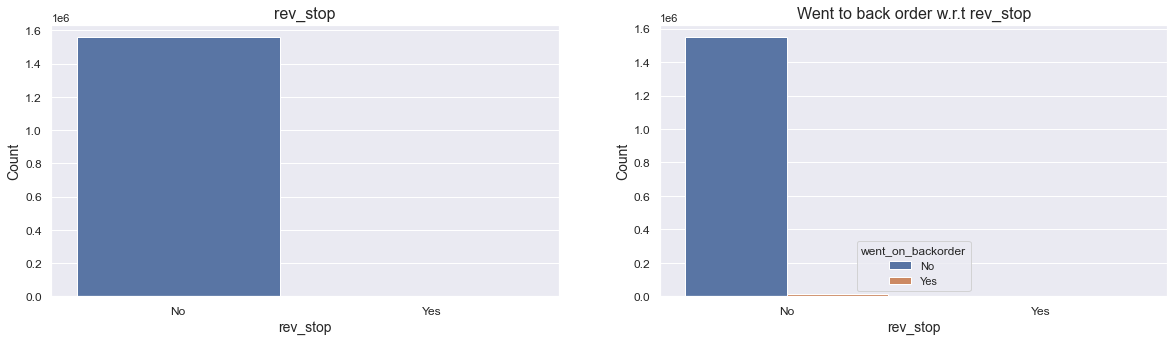

went_on_backorder,No,Yes
rev_stop,,
No,99.3,0.7
Yes,100.0,0.0


In [73]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.countplot(x='rev_stop',data=train_data)
plt.title('rev_stop',fontsize=16)
plt.xlabel('rev_stop',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.subplot(1,2,2)
sns.countplot(x='rev_stop',hue='went_on_backorder',data=train_data)
plt.title('Went to back order w.r.t rev_stop',fontsize=16)
plt.xlabel('rev_stop',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

pd.crosstab(train_data['rev_stop'],train_data['went_on_backorder']).apply(lambda x:round(( x/x.sum())*100,1), axis=1)

When 'rev_stop' is 'Yes', no product went ot backorder.

When 'rev_stop' is 'No', about 0.7% of products went to backorder.

This feature could be helpful in classification, as products goes to backorder when it set to 'No' only.


*Inference:*

**No item went to backorder if rev_stop flag is set to Yes.**

**If potential_issue flag is ‘Yes’ then there is 9 times more chance of item going to back order when compared to if flag set to ‘No’.**

**If oe_cosntraint flag is set to Yes then there is 5 times higher chance of item going to backorder when compared to flag set to No.**

**The remaining flags if individually compared with target variable arenot very useful as proportion of postive cases are almost equally disitributed between both flag values.**

## Multivariate Analysis:

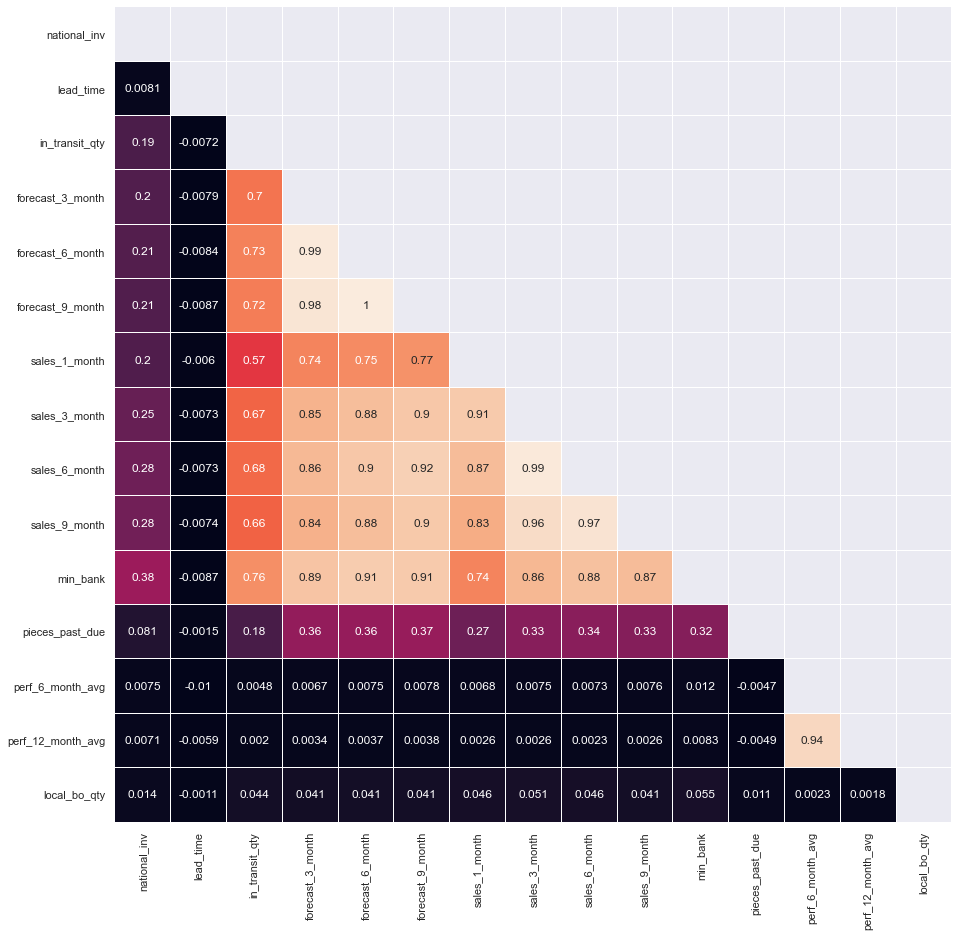

In [74]:
correlation= train_data.corr()
matrix = np.triu(correlation)

plt.figure(figsize=(15,15))
sns.heatmap(correlation, annot=True, linecolor="white",linewidths=0.02,mask=matrix,cbar=False)
plt.show()

highly correlated:

forecast_3_month & forecast_6_month .99

forecast_3_month & forecast_9_month .98

forecast_6_month & forecast_9_month .98

sales_1_month & sales_3_month .92

sales_3_month & sales_6_month .98

sales_6_month & sales_9_month .97

sales_3_month & sales_9_month .98

forecast_9_month & sales_6_month .89

forecast_9_month & sales_9_month .88

sales_1_month & sales_6_month .87

forecast_6_month & sales_6_month .87

forecast_6_month & sales_9_month .86

sales_3_month & min_bank .86

forecast_3_month & sales_6_month .89



Forecast columns are very much correlated with each other.

Sales columns are also very much correlated with each other.

Forecast and sales columns are also very much correlated with each other. These correlations seems logical as forecast depends on sales and previous forecasts

Performance columns are also very much correlated with each other.

'pieces_past_due' also shows some correlation with forecast, sales and 'min_bank' columns.

'min_bank' column showing alot of correlation with forecast, sales and 'in_transit_qty' columns.

'in_transit_qty' is also correlated to forecast and sales columns.

'national_inv' is showing some correlation with 'min_bank' column.

# Base Model 

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,roc_curve,accuracy_score,confusion_matrix,f1_score,classification_report,cohen_kappa_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

#### Model evaluation function

In [76]:
def Scores(ytrain,ytest,ypred_train,ypred_test,ypred_prob_train,ypred_prob_test):
    from sklearn.metrics import roc_auc_score,roc_curve,accuracy_score,confusion_matrix,f1_score,classification_report,cohen_kappa_score
    print('Test Data','\n')
    print(classification_report(ytest,ypred_test),'\n')

    ac_tr = accuracy_score(ytest,ypred_test)
    print("accuracy score of the test data is: ",ac_tr,'\n')

    f1_ts = f1_score(ytest,ypred_test)
    print("F1 score of the test data is: ",f1_ts,'\n')

    cohen_kappa_score_ts = cohen_kappa_score(ytest,ypred_test)
    print("cohen_kappa_score of the test data is: ",cohen_kappa_score_ts,'\n')

    roc_tr = roc_auc_score(ytest,ypred_prob_test[:,1])
    print("roc_auc_score of the test data is: ",roc_tr)


    from matplotlib.colors import ListedColormap
    plt.figure(figsize=(8,6))
    cm1=confusion_matrix(ytest,ypred_test)
    conf_matrix = pd.DataFrame(data = cm1,columns = ['Predicted:0','Predicted:1'], 
                                   index = ['Actual:0','Actual:1'])
    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['black']), cbar = False, 
                    linewidths = 0.1, annot_kws = {'size':25})
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.show()

    print('\n')

    print('Train Data','\n')

    print(classification_report(ytrain,ypred_train),'\n')

    ac_tr = accuracy_score(ytrain,ypred_train)
    print("accuracy score of the train data is: ",ac_tr,'\n')

    f1_tr = f1_score(ytrain,ypred_train)
    print("F1 score of the train data is: ",f1_tr,'\n')

    cohen_kappa_score_tr = cohen_kappa_score(ytrain,ypred_train)
    print("cohen_kappa_score of the train data is: ",cohen_kappa_score_tr,'\n')

    roc_tr = roc_auc_score(ytrain,ypred_prob_train[:,1])
    print("roc_auc_score of the train data is: ",roc_tr)
   
    plt.figure(figsize=(8,6))
    cm=confusion_matrix(ytrain,ypred_train)
    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], 
                                   index = ['Actual:0','Actual:1'])

    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['black']), cbar = False, 
                    linewidths = 0.1, annot_kws = {'size':25})
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.show()



In [77]:
def plot_roc(model):
    y_pred_prob_ts = model.predict_proba(xtest)[:,1]
    y_pred_prob_tr = model.predict_proba(xtrain)[:,1]
    
    plt.figure(figsize=(12,9))
    fpr1, tpr1, thresholds1 = roc_curve(ytest, y_pred_prob_ts)
    fpr2, tpr2, thresholds2 = roc_curve(ytrain, y_pred_prob_tr)
    plt.plot(fpr1, tpr1,label='Train roc_curve')
    plt.plot(fpr2, tpr2,label='Test roc_curve')
    
    plt.plot([0, 1], [0, 1],'r--')
    plt.title('ROC curve for Back order prediction', fontsize = 12)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 12)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 12)
    plt.text(x = 0.79, y = 0.10, s = ('AUC Score test  :',round(roc_auc_score(ytest, y_pred_prob_ts),4)))
    plt.text(x = 0.79, y = 0.07, s = ('AUC Score train :',round(roc_auc_score(ytrain, y_pred_prob_tr),4)))
    plt.grid(True)
    plt.legend(loc='lower right')
    plt.show()

In [78]:
x=df_train.drop('went_on_backorder',axis=1)
y=df_train.went_on_backorder
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.3,random_state=4)

### Logistic regression

In [79]:
LR = LogisticRegression()
LR.fit(xtrain,ytrain)

ytrain_pred_LR = LR.predict(xtrain)
ytrain_prob_LR = LR.predict_proba(xtrain)

ytest_pred_LR = LR.predict(xtest)
ytest_prob_LR = LR.predict_proba(xtest)

#### Model evaluation

Test Data 

              precision    recall  f1-score   support

           0       0.99      1.00      1.00    464328
           1       0.33      0.00      0.00      3187

    accuracy                           0.99    467515
   macro avg       0.66      0.50      0.50    467515
weighted avg       0.99      0.99      0.99    467515
 

accuracy score of the test data is:  0.993170272611574 

F1 score of the test data is:  0.00374414976599064 

cohen_kappa_score of the test data is:  0.003667860204097928 

roc_auc_score of the test data is:  0.8666710819532715


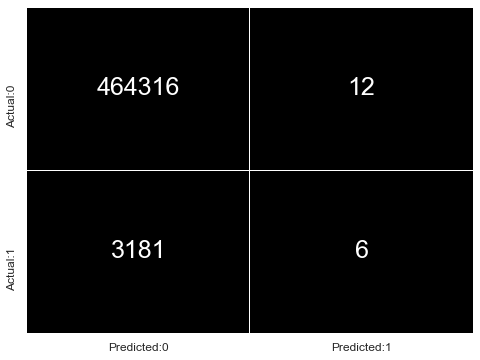



Train Data 

              precision    recall  f1-score   support

           0       0.99      1.00      1.00   1083191
           1       0.35      0.00      0.00      7676

    accuracy                           0.99   1090867
   macro avg       0.67      0.50      0.50   1090867
weighted avg       0.99      0.99      0.99   1090867
 

accuracy score of the train data is:  0.9929569782567444 

F1 score of the train data is:  0.002078191972983504 

cohen_kappa_score of the train data is:  0.002036235260978958 

roc_auc_score of the train data is:  0.8684169011260997


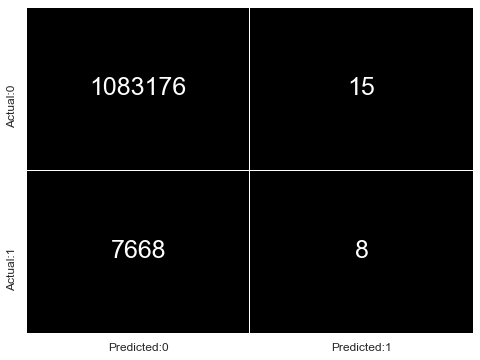

In [80]:
Scores(ytrain,ytest,ytrain_pred_LR,ytest_pred_LR,ytrain_prob_LR,ytest_prob_LR)

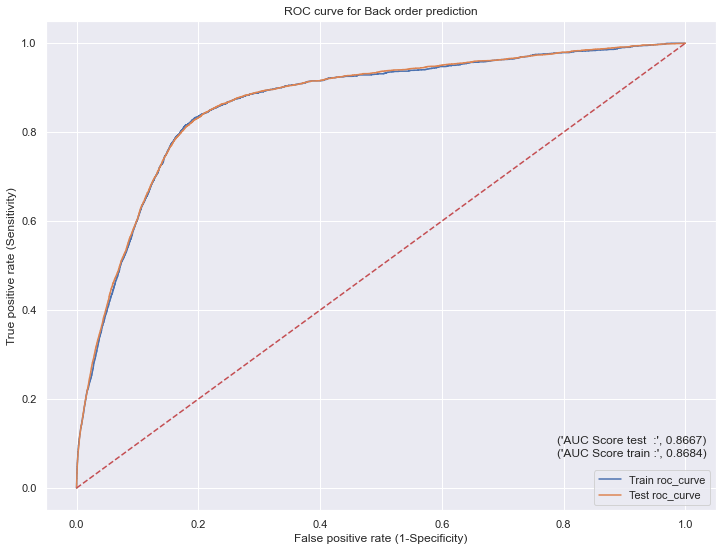

In [81]:
plot_roc(LR)

#### Observations

The accuracy score of the base model is very high. But we can see the f1_score,cohen_kappa_score is poor. We can see the reason for this from the classification report.

With the clear imbalance of the data, the model has completely classified all the went to backorder - yes class as no. And since the number of yes classes is so few the accuracy score is not affected by that. But f1 score being the harmonic mean of the precision and recall, clearly shows that model is just acting like a null model and giving the output as a class the higher probability. Hence we conclude that we have to perform data balancing techniques

### DecisionTreeClassifier

In [82]:
from sklearn.tree import DecisionTreeClassifier

In [83]:
DR = DecisionTreeClassifier()
DR.fit(xtrain,ytrain)

ytrain_pred_DR = DR.predict(xtrain)
ytrain_prob_DR = DR.predict_proba(xtrain)

ytest_pred_DR = DR.predict(xtest)
ytest_prob_DR = DR.predict_proba(xtest)

Test Data 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    464328
           1       0.37      0.39      0.38      3187

    accuracy                           0.99    467515
   macro avg       0.68      0.69      0.69    467515
weighted avg       0.99      0.99      0.99    467515
 

accuracy score of the test data is:  0.9913500101601018 

F1 score of the test data is:  0.38221814848762603 

cohen_kappa_score of the test data is:  0.3778656897209959 

roc_auc_score of the test data is:  0.7123911843162359


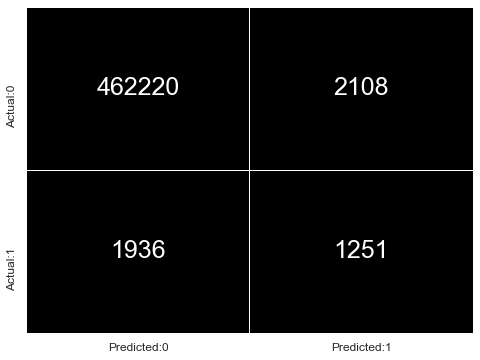



Train Data 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1083191
           1       1.00      0.95      0.97      7676

    accuracy                           1.00   1090867
   macro avg       1.00      0.97      0.99   1090867
weighted avg       1.00      1.00      1.00   1090867
 

accuracy score of the train data is:  0.9996076515285548 

F1 score of the train data is:  0.9713980219192729 

cohen_kappa_score of the train data is:  0.9712006265951507 

roc_auc_score of the train data is:  0.9999659876746475


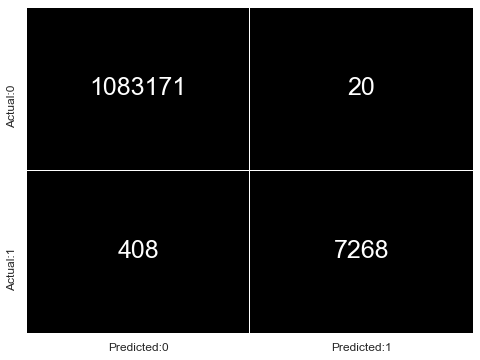

In [84]:
Scores(ytrain,ytest,ytrain_pred_DR,ytest_pred_DR,ytrain_prob_DR,ytest_prob_DR)

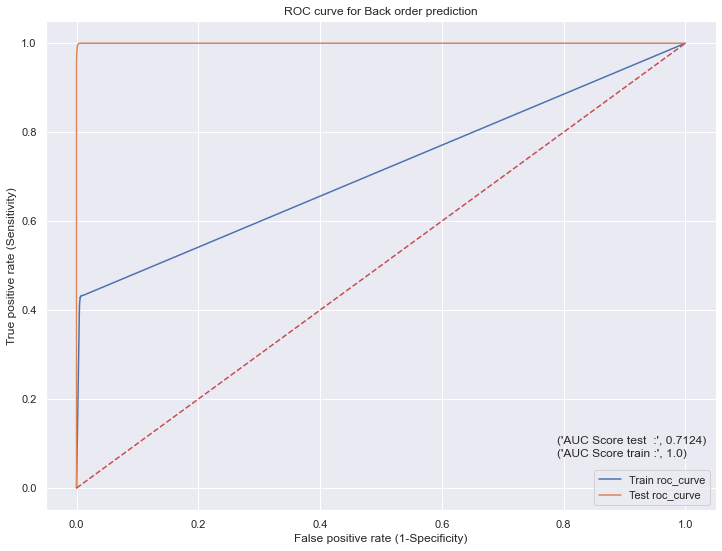

In [85]:
plot_roc(DR)

#### Observations
We can see that DecisionTreeClassifier has overfitted the train data. The test data performance is poor. It performed slightly better than the Logistic regression model.

### RandomForestClassifier

In [86]:
from sklearn.ensemble import RandomForestClassifier

In [87]:
RF = RandomForestClassifier()
RF.fit(xtrain,ytrain)

ytrain_pred_RF = RF.predict(xtrain)
ytrain_prob_RF = RF.predict_proba(xtrain)

ytest_pred_RF = RF.predict(xtest)
ytest_prob_RF = RF.predict_proba(xtest)

Test Data 

              precision    recall  f1-score   support

           0       0.99      1.00      1.00    464328
           1       0.88      0.24      0.38      3187

    accuracy                           0.99    467515
   macro avg       0.94      0.62      0.69    467515
weighted avg       0.99      0.99      0.99    467515
 

accuracy score of the test data is:  0.9946162155224966 

F1 score of the test data is:  0.3826342899190581 

cohen_kappa_score of the test data is:  0.3807913855723174 

roc_auc_score of the test data is:  0.9628505054234758


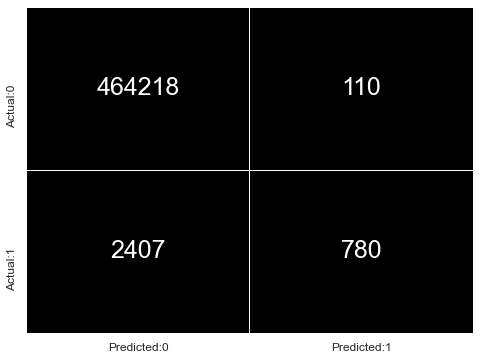



Train Data 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1083191
           1       0.99      0.95      0.97      7676

    accuracy                           1.00   1090867
   macro avg       1.00      0.97      0.99   1090867
weighted avg       1.00      1.00      1.00   1090867
 

accuracy score of the train data is:  0.9996067348265187 

F1 score of the train data is:  0.9714057188562288 

cohen_kappa_score of the train data is:  0.9712078326154213 

roc_auc_score of the train data is:  0.9997487435951796


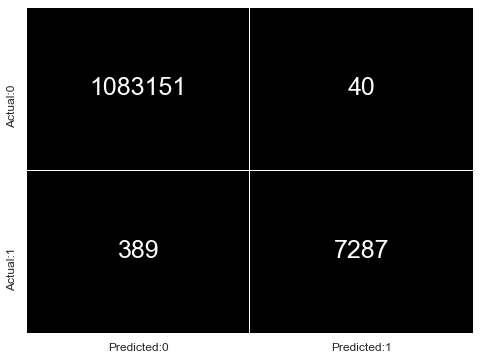

In [88]:
Scores(ytrain,ytest,ytrain_pred_RF,ytest_pred_RF,ytrain_prob_RF,ytest_prob_RF)

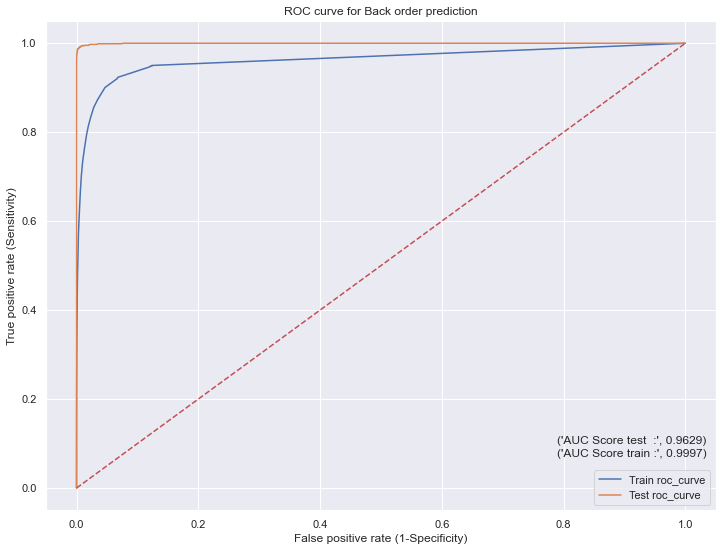

In [89]:
plot_roc(RF)

#### Observations
RandomForestClassifier has also overfitted the train data. The test data performance is poor. It performed slightly better than the Decision tree model. but from the low cohen_kappa_score & F1 score, we can interpret that precision and recall is low for test data .modal performance can be improved using hyperparameter tuning and reducing the complexity of the data by reducing multicollinearity. the imbalance has to be addressed by reducing the data imbalance using SMOT